In this notebook, we propose a demonstartion of MOFA and GLUE pair in omicverse. We apply our implementation as well as the original code on the scRNA-seq and scATAC data of Alzheimer's disease.

# GLUE and MOFA

## Setting up data

In [1]:
from itertools import chain

import anndata as ad
import itertools
import networkx as nx
import pandas as pd
import scanpy as sc
import scglue
import seaborn as sns
from matplotlib import rcParams

In [1]:
import omicverse as ov
ov.utils.ov_plot_set()

2023-05-19 01:06:17.389490: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 01:06:17.475707: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-19 01:06:17.475725: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-19 01:06:17.974469: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

/mnt/data/env/pyomic/lib/python3.8/site-packages/phate/__init__.py


In [3]:
rna = ad.read_h5ad("rna-pp.h5ad")
atac = ad.read_h5ad("atac-pp.h5ad")
#guidance = nx.read_graphml("guidance.graphml.gz")

In [4]:
rna.var_names_make_unique()
rna.obs_names_make_unique()
atac.var_names_make_unique()
atac.obs_names_make_unique()

In [9]:
guidance = scglue.genomics.rna_anchored_guidance_graph(rna, atac)
guidance

window_graph:   0%|          | 0/36643 [00:00<?, ?it/s]

In [13]:
import networkx as nx
rna.write("rna-pp.h5ad", compression="gzip")
atac.write("atac-pp.h5ad", compression="gzip")
nx.write_graphml(guidance, "guidance.graphml.gz")

In [5]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

In [6]:
scglue.models.configure_dataset(
    atac, "NB", use_highly_variable=True,
    use_rep="X_lsi"
)

In [10]:
guidance_hvf = guidance.subgraph(chain(
    rna.var.query("highly_variable").index,
    atac.var.query("highly_variable").index
)).copy()

In [ ]:
glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "atac": atac}, guidance_hvf,
    fit_kws={"directory": "glue"}
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
[INFO] autodevice: Using GPU 0 as computation device.
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 61738
[INFO] SCGLUEModel: Setting `max_epochs` = 48
[INFO] SCGLUEModel: Setting `patience` = 4
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 2
[INFO] SCGLUETrainer: Using training directory: "glue/pretrain"


In [12]:
glue.save("glue.dill")
# glue = scglue.models.load_model("glue.dill")

In [14]:
dx = scglue.models.integration_consistency(
    glue, {"rna": rna, "atac": atac}, guidance_hvf
)
dx

[INFO] integration_consistency: Using layer "counts" for modality "rna"
[INFO] integration_consistency: Selecting aggregation "sum" for modality "rna"
[INFO] integration_consistency: Selecting aggregation "sum" for modality "atac"
[INFO] integration_consistency: Selecting log-norm preprocessing for modality "rna"
[INFO] integration_consistency: Selecting log-norm preprocessing for modality "atac"
[INFO] get_metacells: Clustering metacells...


[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 10 common metacells...
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
[INFO] get_metacells: Clustering metacells...


[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 20 common metacells...
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
[INFO] get_metacells: Clustering metacells...


[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 49 common metacells...
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
[INFO] get_metacells: Clustering metacells...


[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 99 common metacells...
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
[INFO] get_metacells: Clustering metacells...


[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 197 common metacells...
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


n_meta  consistency
0      10     0.459175
1      20     0.402021
2      50     0.327917
3     100     0.303282
4     200     0.246441

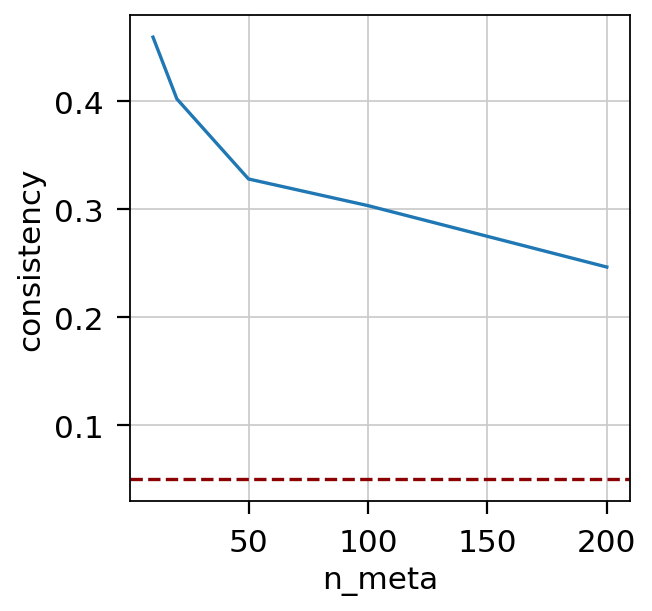

In [15]:
_ = sns.lineplot(x="n_meta", y="consistency", data=dx).axhline(y=0.05, c="darkred", ls="--")

In [16]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
atac.obsm["X_glue"] = glue.encode_data("atac", atac)

In [18]:
rna.obs['domain']='scRNA-seq'
atac.obs['domain']='scATAC-seq'

In [1]:
import scanpy as sc
rna=sc.read("rna-emb.h5ad")
atac=sc.read("atac-emb.h5ad")

In [2]:
import anndata
combined1 = anndata.concat([rna, atac])

/mnt/data/env/pyomic/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
combined1

AnnData object with n_obs × n_vars = 191890 × 0
    obs: 'Diagnosis', 'Batch', 'Cell.Type', 'cluster', 'Age', 'Sex', 'PMI', 'Tangle.Stage', 'Plaque.Stage', 'RIN', 'balancing_weight', 'domain'
    obsm: 'X_glue', 'X_umap'

In [ ]:
sc.pp.neighbors(combined1, use_rep="X_glue", metric="cosine")
#sc.tl.umap(combined)
#sc.pl.umap(combined, color=["Cell.Type", "domain"], wspace=0.65)

In [5]:
from scvi.model.utils import mde
combined1.obsm["X_mde"] = mde(combined1.obsm["X_glue"])

/mnt/data/env/pyomic/lib/python3.8/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/mnt/data/env/pyomic/lib/python3.8/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/mnt/data/env/pyomic/lib/python3.8/site-packages/flax/core/frozen_dict.py:169: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(


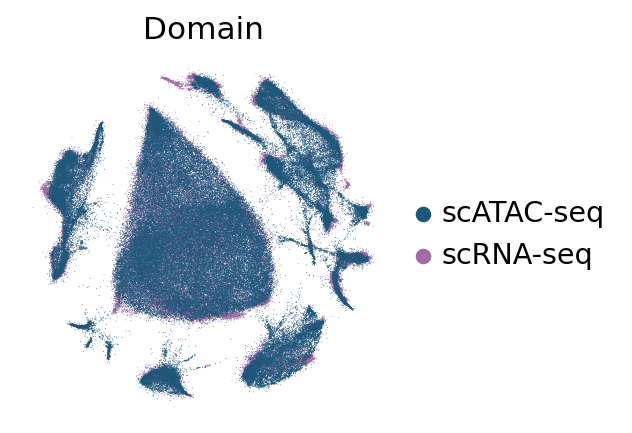

In [11]:
import matplotlib.pyplot as plt
import omicverse as ov
fig, ax = plt.subplots(figsize=(3,3))
sc.pl.embedding(
    combined1,
    basis="X_mde",
    color=["domain"],
    title='Domain',
    frameon=False,
    ncols=2,
    palette=ov.utils.pyomic_palette()[11:],
    show=False,
    ax=ax,
    
)
plt.savefig("figures/umap_domain.png",dpi=300,bbox_inches = 'tight')

In [23]:
feature_embeddings = glue.encode_graph(guidance_hvf)
feature_embeddings = pd.DataFrame(feature_embeddings, index=glue.vertices)
feature_embeddings.iloc[:5, :5]

0         1         2         3         4
A2M         -0.193446 -0.342415  0.119067  0.268406  0.034014
AADACL2-AS1 -0.448315 -0.129871  0.796907  0.016984 -0.639139
AADACP1     -0.235093  0.167198  0.123094  0.015190 -0.094391
ABCA1       -0.154965  0.187572 -0.104705 -0.050889 -0.031023
ABCA10      -0.264874  0.188973  0.009662  0.136203 -0.126329

In [24]:
rna.varm["X_glue"] = feature_embeddings.reindex(rna.var_names).to_numpy()
atac.varm["X_glue"] = feature_embeddings.reindex(atac.var_names).to_numpy()

In [25]:
rna.write("rna-emb.h5ad", compression="gzip")
atac.write("atac-emb.h5ad", compression="gzip")
nx.write_graphml(guidance_hvf, "guidance-hvf.graphml.gz")

In [32]:
atac

AnnData object with n_obs × n_vars = 130418 × 219070
    obs: 'Sample.ID', 'Batch', 'Age', 'Sex', 'PMI', 'Tangle.Stage', 'Plaque.Stage', 'Diagnosis', 'RIN', 'cluster', 'Cell.Type', 'balancing_weight', 'domain'
    var: 'gene_ids', 'feature_types', 'genome', 'chrom', 'chromStart', 'chromEnd', 'highly_variable'
    uns: 'Cell.Type_colors', 'neighbors', 'umap', '__scglue__'
    obsm: 'X_lsi', 'X_umap', 'X_glue'
    varm: 'X_glue'
    obsp: 'connectivities', 'distances'

## GLUE pair

In [38]:
from tqdm import tqdm,trange
import anndata
def glue_pair(rna:anndata.AnnData,
              atac:anndata.AnnData,depth:int=20)->pd.DataFrame:
    r"""
    Pair the cells between RNA and ATAC using result of GLUE.

    Arguments:
        rna: the AnnData of RNA-seq.
        atac: the AnnData of ATAC-seq.
        depth: the depth of the search for the nearest neighbor.
    
    """


    #提取GLUE层结果
    print('......Extract GLUE layer from obs')
    rna_loc=pd.DataFrame(rna.obsm['X_glue'], index=rna.obs.index)
    atac_loc=pd.DataFrame(atac.obsm['X_glue'], index=atac.obs.index)

    #对GLUE层进行Pearson系数分析
    print('......Prepare for pair')
    import gc
    len1=(len(rna_loc)//5000)+1
    len2=(len(atac_loc)//5000)+1
    if len1>len2:
        len1=len2
    p_pd=pd.DataFrame(columns=['rank_'+str(i) for i in range(50)])
    n_pd=pd.DataFrame(columns=['rank_'+str(i) for i in range(50)])
    print('......Start to calculate the Pearson coef')
    for j in range(len1):
        c=pd.DataFrame()
        with trange(len1) as tt:
            for i in tt:
                t1=rna_loc.iloc[5000*(i):5000*(i+1)]
                t2=atac_loc.iloc[5000*(j):5000*(j+1)]
                a=np.corrcoef(t1,t2)[len(t1):,0:len(t1)]
                b=pd.DataFrame(a,index=t2.index,columns=t1.index)  
                c=pd.concat([c,b],axis=1)
                del t1
                del t2
                del a
                del b
                gc.collect()
                tt.set_description('Now Pearson block is {}/{}'.format(i,len1))
        with trange(len(c)) as t:
            for i in t:
                t_c=c.iloc[i]
                p_pd.loc[t_c.name]=c.iloc[i].sort_values(ascending=False)[:50].values
                n_pd.loc[t_c.name]=c.iloc[i].sort_values(ascending=False)[:50].index.tolist()
                t.set_description('Now rna_index is {}/{}, all is {}'.format(i+j*5000,i+j*5000+len(c),len(atac_loc)))
        print('Now epoch is {}, {}/{}'.format(j,j*5000+len(c),len(atac_loc))) 
        del c
        gc.collect()
        
    #寻找最近的细胞，其中depth的灵活调整可以使得配对成功的细胞数变大，同时精度有所下降
    def find_neighbor_cell(p_pd,n_pd,depth=10):
        if depth>50:
            print('......depth limited to 50')
            depth=50
        rubish_c=[]
        finish_c=[]
        with trange(depth) as dt:
            for d in dt:
                p_pd=p_pd.loc[p_pd['rank_{}'.format(d)]>0.9]
                p_pd=p_pd.sort_values('rank_{}'.format(d),ascending=False)
                for i in p_pd.index:
                    name=n_pd.loc[i,'rank_{}'.format(d)]
                    if name not in rubish_c:
                        finish_c.append(i)
                        rubish_c.append(name)
                    else:
                        continue
                p_pd=p_pd.loc[~p_pd.index.isin(finish_c)]
                n_pd=n_pd.loc[~n_pd.index.isin(finish_c)]
                dt.set_description('Now depth is {}/{}'.format(d,depth))
        result=pd.DataFrame()
        result['omic_1']=rubish_c
        result['omic_2']=finish_c
        result.index=['cell_{}'.format(i) for i in range(len(result))]
        return result
    print('......Start to find neighbor')
    res_pair=find_neighbor_cell(p_pd,n_pd,depth=depth)
    return res_pair
res_pair=glue_pair(rna,atac,depth=10)

......Extract GLUE layer from obs
......Prepare for pair
......Start to calculate the Pearson coef


Now rna_index is 4999, 5000/130418: 100%|██████████████████████████████████████████████████████████████████| 5000/5000 [05:24<00:00, 15.41it/s]


Now epoch is 0, 5000/130418


Now rna_index is 4999, 10000/130418: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [05:37<00:00, 14.83it/s]


Now epoch is 1, 10000/130418


Now rna_index is 4999, 15000/130418: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [06:02<00:00, 13.78it/s]


Now epoch is 2, 15000/130418


Now rna_index is 4999, 20000/130418: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [06:12<00:00, 13.43it/s]


Now epoch is 3, 20000/130418


Now rna_index is 4999, 25000/130418: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [06:22<00:00, 13.07it/s]


Now epoch is 4, 25000/130418


Now rna_index is 4999, 30000/130418: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [06:31<00:00, 12.76it/s]


Now epoch is 5, 30000/130418


Now rna_index is 4999, 35000/130418: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [06:41<00:00, 12.45it/s]


Now epoch is 6, 35000/130418


Now rna_index is 4999, 40000/130418: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [06:51<00:00, 12.14it/s]


Now epoch is 7, 40000/130418


Now rna_index is 4999, 45000/130418: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [07:02<00:00, 11.83it/s]


Now epoch is 8, 45000/130418


Now rna_index is 4999, 50000/130418: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [07:14<00:00, 11.50it/s]


Now epoch is 9, 50000/130418


Now rna_index is 4999, 55000/130418: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [07:19<00:00, 11.39it/s]


Now epoch is 10, 55000/130418


Now rna_index is 4999, 60000/130418: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [07:26<00:00, 11.20it/s]


Now epoch is 11, 60000/130418


Now rna_index is 4999, 65000/130418: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [07:37<00:00, 10.92it/s]


Now epoch is 12, 65000/130418
......Start to find neighbor


Now depth is 19/20: 100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:47<00:00,  2.40s/it]


In [40]:
res_pair.shape

(28353, 2)

In [44]:
rna1=rna[res_pair['omic_1']]
rna1

View of AnnData object with n_obs × n_vars = 28353 × 36643
    obs: 'SampleID', 'Diagnosis', 'Batch', 'Cell.Type', 'cluster', 'Age', 'Sex', 'PMI', 'Tangle.Stage', 'Plaque.Stage', 'RIN', 'balancing_weight', 'domain'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'hgnc_id'
    uns: 'Cell.Type_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap', '__scglue__'
    obsm: 'X_pca', 'X_umap', 'X_glue'
    varm: 'PCs', 'X_glue'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [45]:
atac1=atac[res_pair['omic_2']]
atac1

View of AnnData object with n_obs × n_vars = 28353 × 219070
    obs: 'Sample.ID', 'Batch', 'Age', 'Sex', 'PMI', 'Tangle.Stage', 'Plaque.Stage', 'Diagnosis', 'RIN', 'cluster', 'Cell.Type', 'balancing_weight', 'domain'
    var: 'gene_ids', 'feature_types', 'genome', 'chrom', 'chromStart', 'chromEnd', 'highly_variable'
    uns: 'Cell.Type_colors', 'neighbors', 'umap', '__scglue__'
    obsm: 'X_lsi', 'X_umap', 'X_glue'
    varm: 'X_glue'
    obsp: 'connectivities', 'distances'

In [46]:
from scvi.model.utils import mde
rna1.obsm["X_mde"] = mde(rna1.obsm["X_glue"])
atac1.obsm["X_mde"] = mde(atac1.obsm["X_glue"])

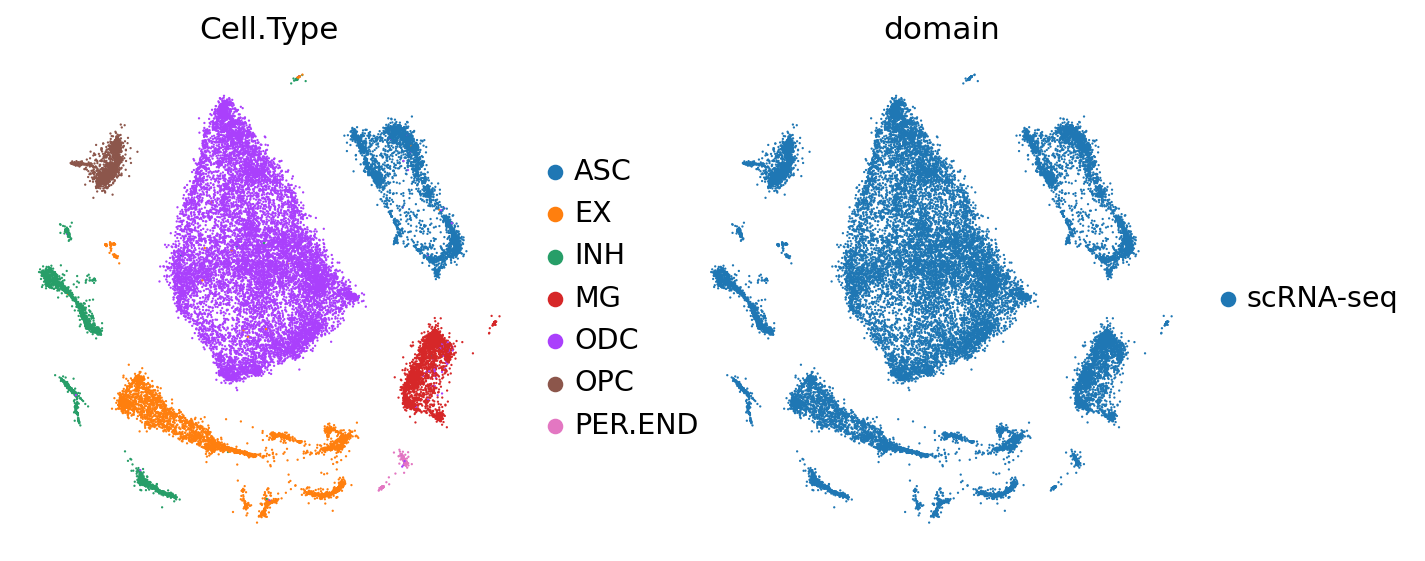

In [47]:
sc.pl.embedding(
    rna1,
    basis="X_mde",
    color=["Cell.Type", "domain"],
    frameon=False,
    ncols=2,
)

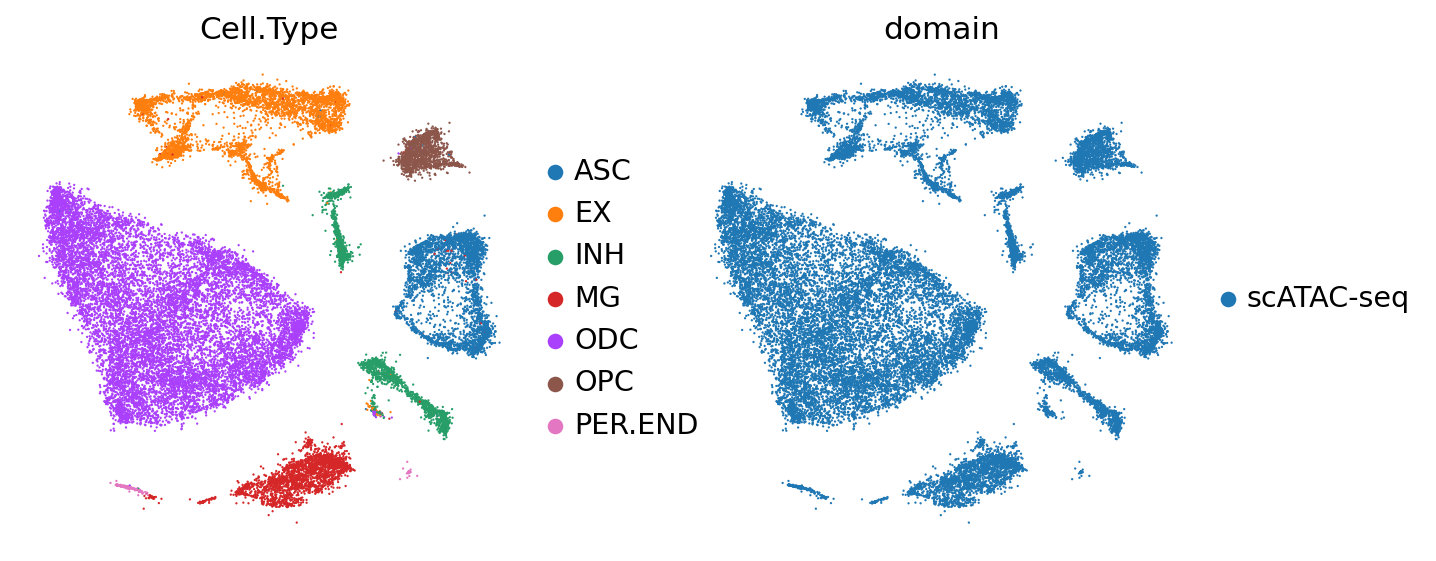

In [48]:
sc.pl.embedding(
    atac1,
    basis="X_mde",
    color=["Cell.Type", "domain"],
    frameon=False,
    ncols=2,
)

In [49]:
rna1.obs.index=res_pair.index
atac1.obs.index=res_pair.index

In [54]:
res_pair.to_csv('res_pair.csv')

In [50]:
from mudata import MuData

mdata = MuData({'rna': rna1, 'atac': atac1})
mdata

MuData object with n_obs × n_vars = 28353 × 255713
  var:	'gene_ids', 'feature_types', 'genome', 'highly_variable', 'chrom', 'chromStart', 'chromEnd'
  2 modalities
    rna:	28353 x 36643
      obs:	'SampleID', 'Diagnosis', 'Batch', 'Cell.Type', 'cluster', 'Age', 'Sex', 'PMI', 'Tangle.Stage', 'Plaque.Stage', 'RIN', 'balancing_weight', 'domain'
      var:	'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'hgnc_id'
      uns:	'Cell.Type_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap', '__scglue__', 'domain_colors'
      obsm:	'X_pca', 'X_umap', 'X_glue', 'X_mde'
      varm:	'PCs', 'X_glue'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    atac:	28353 x 219070
      obs:	'Sample.ID', 'Batch', 'Age', 'Sex', 'PMI', 'Tangle.Stage', 'Plaque.Stage', 'Diagnosis', 'RIN', 'cluster', 'Cell.Type', 'balancing_weight', 'domain'
      var:	'gene_ids', 'feature_types', 'genome', 'chrom', 'chromStart', 'chromEnd', 'highly_variable'
      uns:	'Cell.Type_colors', 'neighbors', 'umap', '__scglue__', 'domain_colors'
      obsm:	'X_lsi', 'X_umap', 'X_glue', 'X_mde'
      varm:	'X_glue'
      obsp:	'connectivities', 'distances'

In [52]:
mdata.write("ad.h5mu",compression='gzip')

In [ ]:
import muon as mu

In [3]:
from sklearn.metrics import adjusted_rand_score as ari
ari(mdata.obs['rna:Cell.Type'], mdata.obs['atac:Cell.Type'])

0.9719116168202193

In [ ]:
mu.tl.mofa(mdata, outfile="models/ad_rna_atac.hdf5")

## MOFA data prepare

In [7]:
rna1=mdata['rna']
rna1=rna1[:,rna1.var['highly_variable']==True]
atac1=mdata['atac']
atac1=atac1[:,atac1.var['highly_variable']==True]


In [8]:
rna1.write("rna-hvf.h5ad", compression="gzip")
atac1.write("atac-hvf.h5ad", compression="gzip")

In [2]:
mdata=mu.read('ad.h5mu')

In [2]:
rna1=ov.utils.read('rna-hvf.h5ad')
atac1=ov.utils.read('atac-hvf.h5ad')

In [5]:
import random
random_obs_index=random.sample(list(rna1.obs.index),5000)

In [9]:
from sklearn.metrics import adjusted_rand_score as ari
ari(rna1[random_obs_index].obs['Cell.Type'], atac1[random_obs_index].obs['Cell.Type'])

0.9723725925034213

In [10]:
rna1[random_obs_index].write("rna-mofa.h5ad", compression="gzip")
atac1[random_obs_index].write("atac-mofa.h5ad", compression="gzip")

In [4]:
rna1=ov.utils.read('rna-mofa.h5ad')
atac1=ov.utils.read('atac-mofa.h5ad')

## MOFA trainging

In [3]:
test_mofa=ov.single.mofa(omics=[rna1,atac1],
                             omics_name=['RNA','ATAC'])

In [4]:
test_mofa.mofa_preprocess()
test_mofa.mofa_run(outfile='models/ad_rna_atac.hdf5')


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Successfully loaded view='RNA' group='group0' with N=5000 samples and D=3161 features...
Successfully loaded view='ATAC' group='group0' with N=5000 samples and D=58097 features...




Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determ

In [5]:
from mudata import MuData

mdata = MuData({'rna': rna1, 'atac': atac1})
mdata

MuData object with n_obs × n_vars = 5000 × 61258
  var:	'gene_ids', 'feature_types', 'genome', 'highly_variable', 'chrom', 'chromStart', 'chromEnd'
  2 modalities
    rna:	5000 x 3161
      obs:	'SampleID', 'Diagnosis', 'Batch', 'Cell.Type', 'cluster', 'Age', 'Sex', 'PMI', 'Tangle.Stage', 'Plaque.Stage', 'RIN', 'balancing_weight', 'domain'
      var:	'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'hgnc_id'
      uns:	'Cell.Type_colors', '__scglue__', 'domain_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_glue', 'X_mde', 'X_pca', 'X_umap'
      varm:	'PCs', 'X_glue'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    atac:	5000 x 58097
      obs:	'Sample.ID', 'Batch', 'Age', 'Sex', 'PMI', 'Tangle.Stage', 'Plaque.Stage', 'Diagnosis', 'RIN', 'cluster', 'Cell.Type', 'balancing_weight', 'domain'
      var:	'gene_ids', 'feature_types', 'genome', 'chrom', 'chromStart', 'chromEnd', 'highly_variable'
      uns:	'Cell.Type_colors', '__scglue__', 'domain_colors', 'neighbors', 'umap'
      obsm:	'X_glue', 'X_lsi', 'X_mde', 'X_umap'
      varm:	'X_glue'
      obsp:	'connectivities', 'distances'

In [6]:
# # NOTE: if you wish to load the trained model,
# #       use mofax library to quickly add
# #       factors and weights matrices
# #       to the mdata object
# #
import mofax as mfx
model = mfx.mofa_model('models/ad_rna_atac.hdf5')
mdata.obsm["X_mofa"] = model.get_factors()
model.close()

In [69]:
m.get_factors().shape[1]

(5000, 13)

In [7]:
mdata.obsm['X_mofa'].shape

(5000, 13)

In [9]:
# Copy colours that were defined previously
mdata.uns = mdata.uns or dict()
mdata.uns['rna:Cell.Type_colors'] = mdata['rna'].uns['Cell.Type_colors']
mdata.uns['atac:Cell.Type_colors'] = mdata['atac'].uns['Cell.Type_colors']

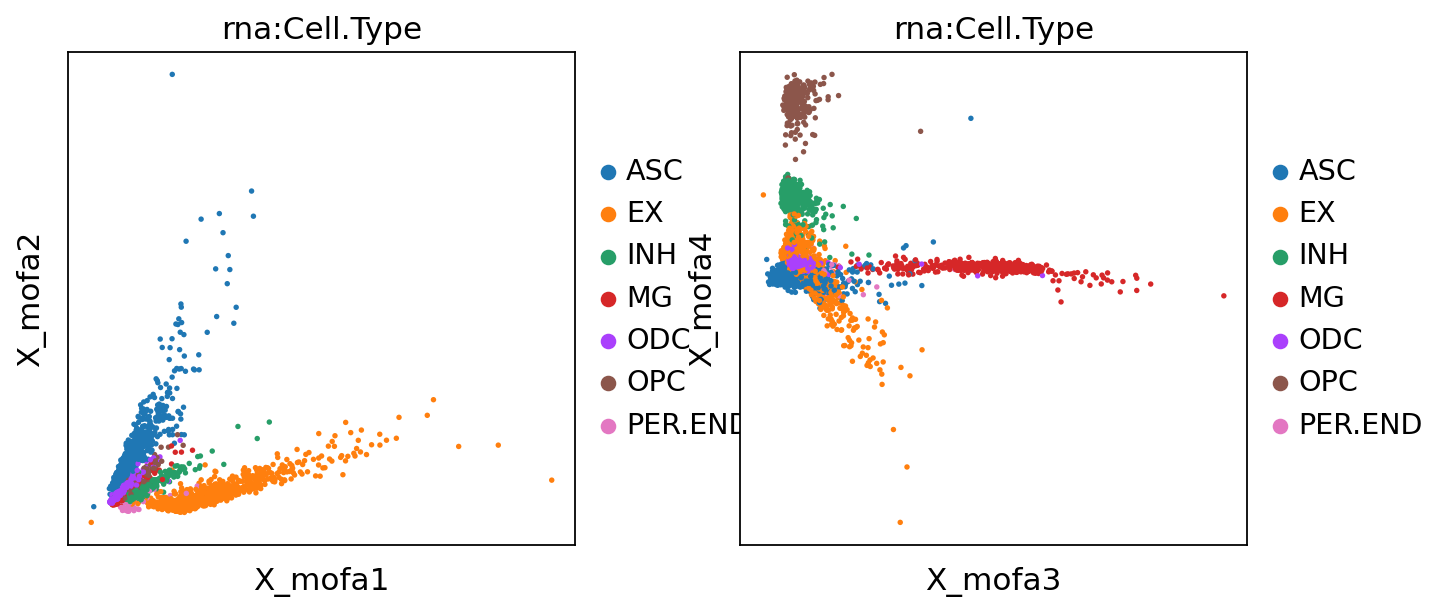

In [11]:
import muon as mu
mu.pl.mofa(mdata, color="rna:Cell.Type", components=["1,2", "3,4"])

In [20]:
m = mfx.mofa_model('models/ad_rna_atac.hdf5')
a1=m.get_r2()


In [21]:
a1.head()

Factor  View   Group        R2
0  Factor1   RNA  group0  6.185937
1  Factor1  ATAC  group0  0.625745
2  Factor2   RNA  group0  1.907447
3  Factor2  ATAC  group0  2.482087
4  Factor3   RNA  group0  3.663136

In [29]:
import pandas as pd
plot_data=pd.DataFrame()
for i in m.get_r2()['View'].unique():
    plot_data[i]=m.get_r2().loc[m.get_r2()['View']==i,'R2'].values
plot_data

RNA      ATAC
0   6.185937  0.625745
1   1.907447  2.482087
2   3.663136  0.207662
3   2.290023  0.001297
4   1.176851  0.032663
5   1.002245  0.042093
6   0.090284  0.616941
7   0.074696  0.465844
8   0.020677  0.323996
9   0.048964  0.178057
10  0.109093  0.103680
11  0.031659  0.124130
12 -1.605516  0.531147

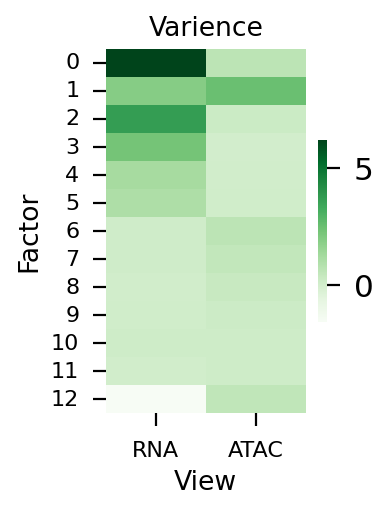

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2,3))
sns.heatmap(plot_data,cmap='Greens',ax=ax,xticklabels=True,yticklabels=True,
            cbar_kws={'shrink':0.5})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Factor',fontsize=12)
plt.xlabel('View',fontsize=12)
plt.title('Varience',fontsize=12)
plt.savefig("figures/mofa_varience.png",dpi=300,bbox_inches = 'tight')


In [129]:
f1_w=ov.single.get_weights(hdf5_path='models/ad_rna_atac.hdf5',view='RNA',factor=1)
f1_w.sort_values('weights',ascending=False)


feature   weights  abs_weights sig
1619      b'RNA_RALYL'  1.000000     1.000000   +
2177      b'RNA_NELL2'  0.981866     0.981866   +
677     b'RNA_STXBP5L'  0.978343     0.978343   +
1528     b'RNA_DLGAP2'  0.977844     0.977844   +
2463     b'RNA_GABRB3'  0.965634     0.965634   +
...                ...       ...          ...  ..
520       b'RNA_ERBB4' -0.293090     0.293090   -
1021     b'RNA_SLC1A3' -0.302998     0.302998   -
1108  b'RNA_LINC01170' -0.386568     0.386568   -
878        b'RNA_SPP1' -0.398615     0.398615   -
2032      b'RNA_NEAT1' -0.631516     0.631516   -

[3161 rows x 4 columns]

In [67]:
f1_w.index=[str(i,"utf8").replace('RNA_','') for i in f1_w['feature']]
f1_w

feature   weights  abs_weights sig
GABRD          b'RNA_GABRD'  0.388015     0.388015   +
HES5            b'RNA_HES5'  0.000463     0.000463   +
TTC34          b'RNA_TTC34'  0.113615     0.113615   +
PRDM16        b'RNA_PRDM16' -0.000092     0.000092   -
LINC01646  b'RNA_LINC01646'  0.000030     0.000030   +
...                     ...       ...          ...  ..
MT-CO3        b'RNA_MT-CO3'  0.242487     0.242487   +
MT-ND3        b'RNA_MT-ND3'  0.125587     0.125587   +
MT-ND4        b'RNA_MT-ND4'  0.161691     0.161691   +
MT-ND5        b'RNA_MT-ND5'  0.104282     0.104282   +
MT-CYB        b'RNA_MT-CYB'  0.165990     0.165990   +

[3161 rows x 4 columns]

In [125]:
factor_w=pd.DataFrame(index=rna1.var.index)
for i in range(m.get_factors().shape[1]):
    f1_w=ov.single.get_weights(hdf5_path='models/ad_rna_atac.hdf5',view='RNA',factor=i+1)
    f1_w.index=[str(i,"utf8").replace('RNA_','') for i in f1_w['feature']]
    f1_w=f1_w.loc[rna1.var.index]
    factor_w['factor_{}'.format(i+1)]=f1_w['weights']

In [16]:
ov.single.get_weights(hdf5_path='models/ad_rna_atac.hdf5',view='RNA',factor=1)

feature   weights  abs_weights sig
0         b'RNA_GABRD'  0.388015     0.388015   +
1          b'RNA_HES5'  0.000463     0.000463   +
2         b'RNA_TTC34'  0.113615     0.113615   +
3        b'RNA_PRDM16' -0.000092     0.000092   -
4     b'RNA_LINC01646'  0.000030     0.000030   +
...                ...       ...          ...  ..
3156     b'RNA_MT-CO3'  0.242487     0.242487   +
3157     b'RNA_MT-ND3'  0.125587     0.125587   +
3158     b'RNA_MT-ND4'  0.161691     0.161691   +
3159     b'RNA_MT-ND5'  0.104282     0.104282   +
3160     b'RNA_MT-CYB'  0.165990     0.165990   +

[3161 rows x 4 columns]

In [126]:
rna1.varm['factor_weight']=factor_w.values

In [127]:
factor_w.head()

factor_1  factor_2  factor_3  factor_4  factor_5  factor_6  \
GABRD      0.388015 -0.096568 -0.002226 -0.000855  0.000358  0.341265   
HES5       0.000463  0.276760 -0.031110 -0.003222  0.000457 -0.143575   
TTC34      0.113615  0.138576 -0.002731 -0.052147  0.007113 -0.004158   
PRDM16    -0.000092  0.901125 -0.147763 -0.171246 -0.043769 -0.362034   
LINC01646  0.000030 -0.000013 -0.000006 -0.000003  0.000025  0.000010   

           factor_7  factor_8  factor_9  factor_10     factor_11  factor_12  \
GABRD     -0.003031  0.000224 -0.003167   0.000032 -2.651118e-04  -0.001843   
HES5      -0.000092 -0.001769  0.002673   0.000025  2.178488e-05  -0.000227   
TTC34     -0.002309 -0.001182 -0.017258   0.000029 -6.750181e-05   0.000351   
PRDM16    -0.007310  0.023654 -0.012479   0.000570 -9.746646e-06   0.002236   
LINC01646  0.000036 -0.000005  0.000341   0.000002  4.687552e-07  -0.000014   

           factor_13  
GABRD      -0.028821  
HES5       -0.258354  
TTC34      -0.207835  
PRDM16     -0.865202  
LINC01646  -0.000011

In [59]:
rna1=ov.single.factor_exact(rna1,hdf5_path='models/ad_rna_atac.hdf5')
rna1

AnnData object with n_obs × n_vars = 5000 × 3161
    obs: 'SampleID', 'Diagnosis', 'Batch', 'Cell.Type', 'cluster', 'Age', 'Sex', 'PMI', 'Tangle.Stage', 'Plaque.Stage', 'RIN', 'balancing_weight', 'domain', 'factor1', 'factor2', 'factor3', 'factor4', 'factor5', 'factor6', 'factor7', 'factor8', 'factor9', 'factor10', 'factor11', 'factor12', 'factor13'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'hgnc_id'
    uns: 'Cell.Type_colors', '__scglue__', 'domain_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_glue', 'X_mde', 'X_pca', 'X_umap'
    varm: 'PCs', 'X_glue'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [130]:
plot_data1=ov.single.factor_correlation(adata=rna1,cluster='Cell.Type',factor_list=range(1,14))

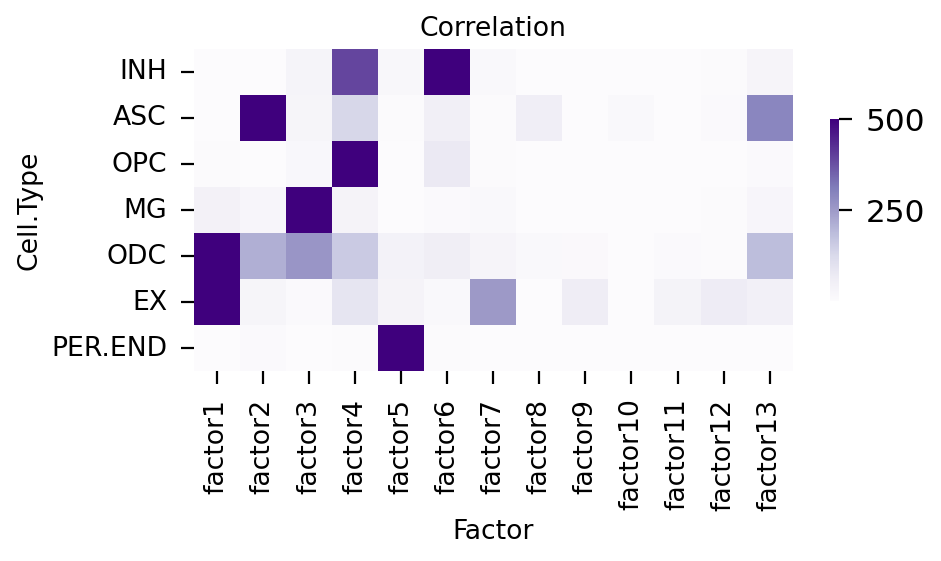

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,3))
sns.heatmap(plot_data1,cmap='Purples',ax=ax,square=True,cbar_kws={'shrink':0.5})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Factor',fontsize=12)
plt.ylabel('Cell.Type',fontsize=12)
plt.title('Correlation',fontsize=12)
plt.savefig("figures/mofa_correlation.png",dpi=300,bbox_inches = 'tight')


In [86]:
rna1.obsm['X_mofa']=m.get_factors()

In [96]:
m.get_factors().shape

(5000, 13)

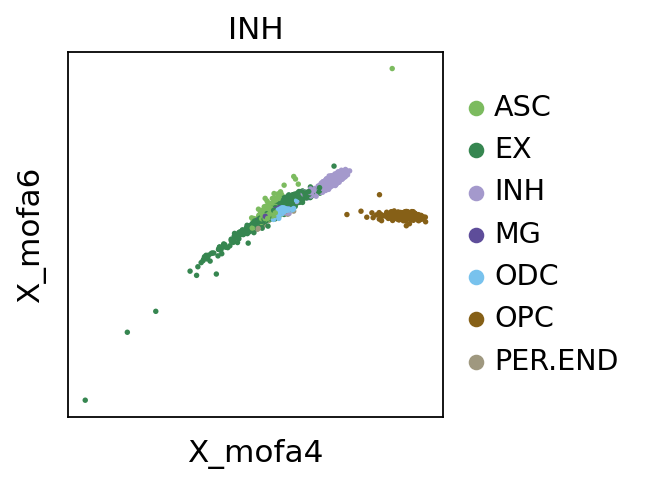

In [234]:
fig, ax = plt.subplots(figsize=(3,3))
factor1,factor2=4,6
sc.pl.embedding(
    adata=rna1,
    basis='X_mofa',
    color='Cell.Type',
    title='INH',
    components="{},{}".format(factor1,factor2),
    palette=ov.utils.pyomic_palette(),
    #frameon=False,
    ncols=2,
    ax=ax
)
fig.savefig("figures/mofa_factor_{}_{}.png".format(factor1,factor2),dpi=300,bbox_inches = 'tight')


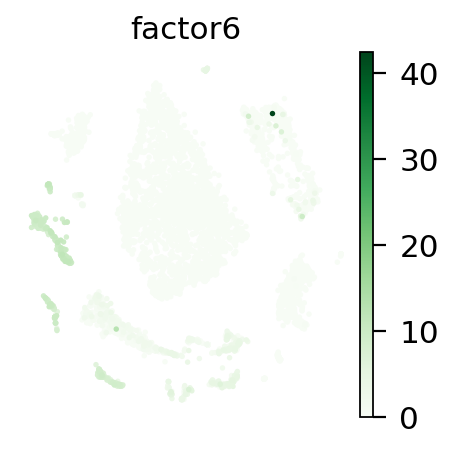

In [229]:
fig, ax = plt.subplots(figsize=(3,3))
sc.pl.embedding(
    rna1,
    basis="X_mde",
    color=["factor6"],
    frameon=False,
    ncols=2,
    #palette=ov.utils.pyomic_palette(),
    show=False,
    cmap='Greens',
    vmin=0,
    ax=ax
)
plt.savefig("figures/umap_factor6.png",dpi=300,bbox_inches = 'tight')


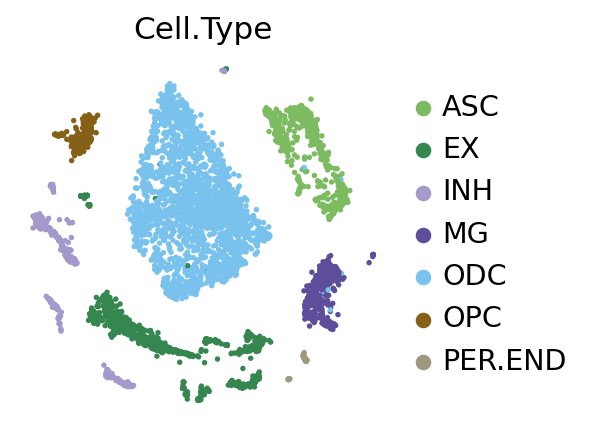

In [204]:
fig, ax = plt.subplots(figsize=(3,3))
sc.pl.embedding(
    rna1,
    basis="X_mde",
    color=["Cell.Type"],
    frameon=False,
    ncols=2,
    #palette=ov.utils.pyomic_palette(),
    show=False,
    cmap='Purples_r',
    ax=ax
)
plt.savefig("figures/umap_celltype_rna.png",dpi=300,bbox_inches = 'tight')


In [106]:
import anndata
combined = anndata.concat([rna1, atac1])

In [107]:
combined

AnnData object with n_obs × n_vars = 10000 × 0
    obs: 'Diagnosis', 'Batch', 'Cell.Type', 'cluster', 'Age', 'Sex', 'PMI', 'Tangle.Stage', 'Plaque.Stage', 'RIN', 'balancing_weight', 'domain'
    obsm: 'X_glue', 'X_mde', 'X_umap'

In [108]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
#sc.tl.umap(combined)
#sc.pl.umap(combined, color=["Cell.Type", "domain"], wspace=0.65)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)


In [109]:
from scvi.model.utils import mde
combined.obsm["X_mde"] = mde(combined.obsm["X_glue"])

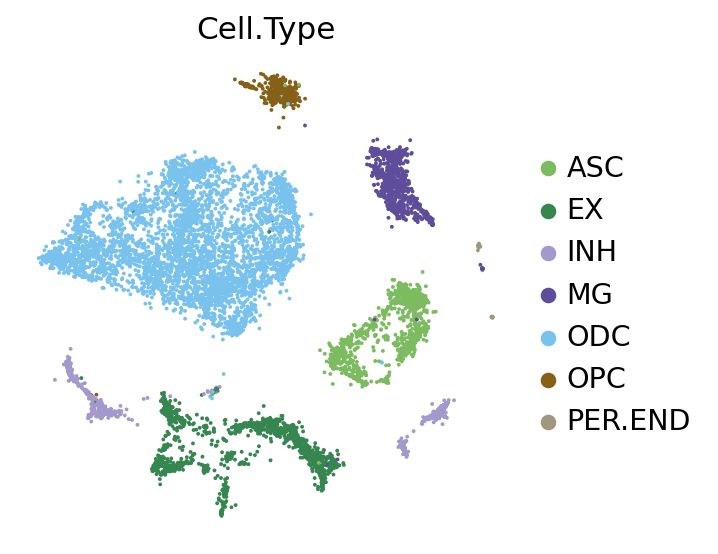

In [138]:
sc.pl.embedding(
    combined,
    basis="X_mde",
    color=["Cell.Type"],
    frameon=False,
    ncols=2,
    palette=ov.utils.pyomic_palette(),
    show=False,
)
plt.savefig("figures/umap_celltype.png",dpi=300,bbox_inches = 'tight')


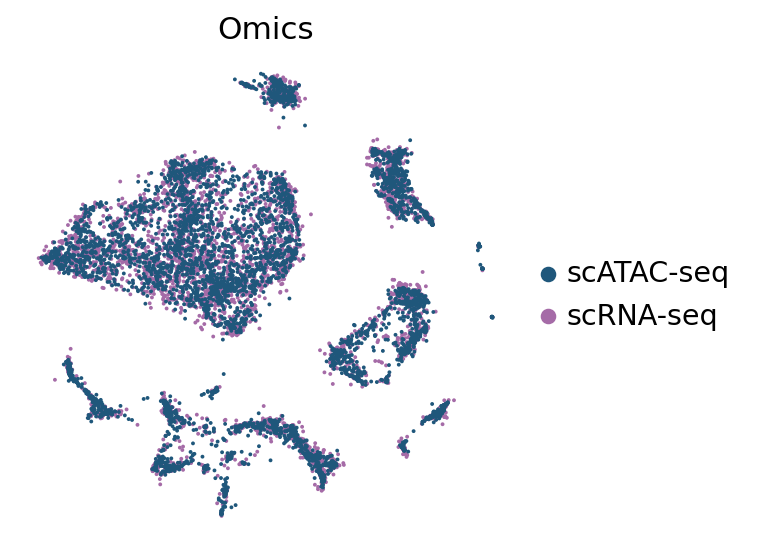

In [140]:
sc.pl.embedding(
    combined,
    basis="X_mde",
    color=["domain"],
    title='Omics',
    frameon=False,
    ncols=2,
    palette=ov.utils.pyomic_palette()[11:],
    show=False,
)
plt.savefig("figures/umap_domain.png",dpi=300,bbox_inches = 'tight')


In [114]:
factor_w[['factor_4','factor_6']]

factor_4  factor_6
GABRD     -0.002226  0.000358
HES5      -0.031110  0.000457
TTC34     -0.002731  0.007113
PRDM16    -0.147763 -0.043769
LINC01646 -0.000006  0.000025
...             ...       ...
MT-CO3    -0.026080  0.000006
MT-ND3    -0.065518 -0.007528
MT-ND4    -0.074759 -0.003568
MT-ND5    -0.050181 -0.009814
MT-CYB    -0.057740 -0.004356

[3161 rows x 2 columns]

In [ ]:
import pandas as pd
factor_w=pd.DataFrame()
view='RNA'
for i in range(model.get_factors().shape[1]):
    f1_w=ov.single.get_weights(hdf5_path='models/ad_rna_atac.hdf5',view=view,factor=i+1)
    f1_w.index=[str(i,"utf8").replace('{}_'.format(view),'') for i in f1_w['feature']]
    factor_w['factor_{}'.format(i+1)]=f1_w['weights']
factor_w.index=[str(i,"utf8").replace('{}_'.format(view),'') for i in f1_w['feature']]
factor_w

In [27]:
factor_w['factor_1'].sort_values(ascending=False)

RALYL        1.000000
NELL2        0.981866
STXBP5L      0.978343
DLGAP2       0.977844
GABRB3       0.965634
               ...   
ERBB4       -0.293090
SLC1A3      -0.302998
LINC01170   -0.386568
SPP1        -0.398615
NEAT1       -0.631516
Name: factor_1, Length: 3161, dtype: float64

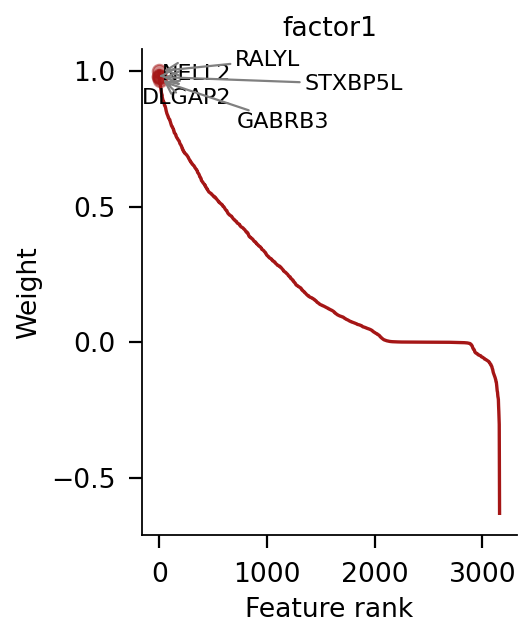

In [53]:
fig, ax = plt.subplots(figsize=(3,4))
plot_data4=pd.DataFrame()
plot_data4['weight']=factor_w['factor_1'].sort_values(ascending=False)
plot_data4['rank']=range(len(plot_data4['weight']))
plt.plot(plot_data4['rank'],plot_data4['weight'],color='#a51616')

hub_gene=plot_data4.index[:5]
plt.scatter(plot_data4.loc[hub_gene,'rank'],
           plot_data4.loc[hub_gene,'weight'],color='#a51616',
            alpha=0.5)

from adjustText import adjust_text
texts=[ax.text(plot_data4.loc[i,'rank'],
                   plot_data4.loc[i,'weight'],
                   i,
                   fontdict={'size':10,'weight':'normal','color':'black'}
                   ) for i in hub_gene]

adjust_text(texts,only_move={'text': 'xy'},arrowprops=dict(arrowstyle='->', color='grey'),)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title('factor1',fontsize=12,)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Feature rank',fontsize=12)
plt.ylabel('Weight',fontsize=12)


plt.grid(False)

In [22]:
factor1,factor2=6,4
plot_data3=factor_w[['factor_{}'.format(factor1),'factor_{}'.format(factor2)]]
plot_data3['sig']='normal'
plot_data3.loc[(plot_data3['factor_{}'.format(factor1)]>0.5)&(plot_data3['factor_{}'.format(factor2)]>0.5),'sig']='up-up'
plot_data3.loc[(plot_data3['factor_{}'.format(factor1)]>0.5)&(plot_data3['factor_{}'.format(factor2)]<-0.5),'sig']='up-down'
plot_data3.loc[(plot_data3['factor_{}'.format(factor1)]<-0.5)&(plot_data3['factor_{}'.format(factor2)]>0.5),'sig']='down-up'
plot_data3.loc[(plot_data3['factor_{}'.format(factor1)]<-0.5)&(plot_data3['factor_{}'.format(factor2)]<-0.5),'sig']='down-down'



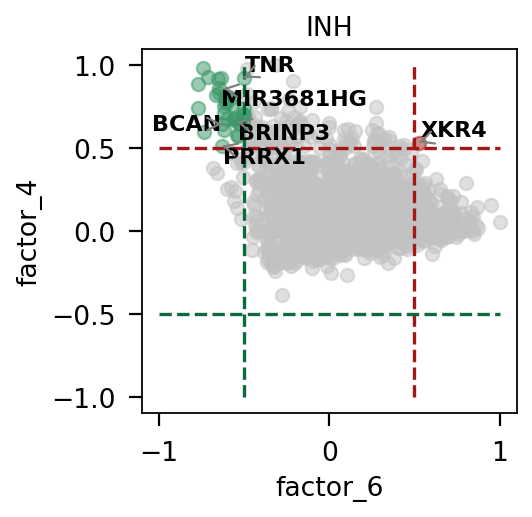

In [233]:
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(plot_data3.loc[plot_data3['sig']=='normal','factor_{}'.format(factor1)],
           plot_data3.loc[plot_data3['sig']=='normal','factor_{}'.format(factor2)],
          color='#c2c2c2',alpha=0.5)

ax.scatter(plot_data3.loc[plot_data3['sig']=='up-up','factor_{}'.format(factor1)],
           plot_data3.loc[plot_data3['sig']=='up-up','factor_{}'.format(factor2)],
           color='#a51616',alpha=0.5)

ax.scatter(plot_data3.loc[plot_data3['sig']=='up-down','factor_{}'.format(factor1)],
           plot_data3.loc[plot_data3['sig']=='up-down','factor_{}'.format(factor2)],
           color='#e25d5d',alpha=0.5)

ax.scatter(plot_data3.loc[plot_data3['sig']=='down-up','factor_{}'.format(factor1)],
           plot_data3.loc[plot_data3['sig']=='down-up','factor_{}'.format(factor2)],
           color='#3b9868',alpha=0.5)

ax.scatter(plot_data3.loc[plot_data3['sig']=='down-down','factor_{}'.format(factor1)],
           plot_data3.loc[plot_data3['sig']=='down-down','factor_{}'.format(factor2)],
           color='#0d6a3b',alpha=0.5)

plt.vlines(x=0.5,ymin=-1,ymax=1,color='#a51616',linestyles='dashed')
plt.hlines(y=0.5,xmin=-1,xmax=1,color='#a51616',linestyles='dashed')

plt.vlines(x=-0.5,ymin=-1,ymax=1,color='#0d6a3b',linestyles='dashed')
plt.hlines(y=-0.5,xmin=-1,xmax=1,color='#0d6a3b',linestyles='dashed')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.grid(False)

plt.xlabel('factor_{}'.format(factor1),fontsize=12)
plt.ylabel('factor_{}'.format(factor2),fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

from adjustText import adjust_text

for sig,color in zip(['up-up','up-down','down-up','down-down'],
                     ['#a51616','#e25d5d','#3b9868','#0d6a3b']):
    hub_gene=plot_data3.loc[plot_data3['sig']==sig].index.tolist()
    if len(hub_gene)==0:
        continue
    texts=[ax.text(plot_data3.loc[i,'factor_{}'.format(factor1)],
                   plot_data3.loc[i,'factor_{}'.format(factor2)],
                   i,
                   fontdict={'size':10,'weight':'bold','color':'black'}
                   ) for i in hub_gene[:5]]

    adjust_text(texts,only_move={'text': 'xy'},arrowprops=dict(arrowstyle='->', color='grey'),)

plt.title('INH',fontsize=12)
plt.savefig("figures/factor_gene_inh.png",dpi=300,bbox_inches = 'tight')


In [230]:
factor1,factor2=6,4
plot_data3=factor_w[['factor_{}'.format(factor1),'factor_{}'.format(factor2)]]
plot_data3['sig']='normal'
plot_data3.loc[(plot_data3['factor_{}'.format(factor1)]>0.5),'sig']='up'
plot_data3.loc[(plot_data3['factor_{}'.format(factor1)]<-0.5),'sig']='down'



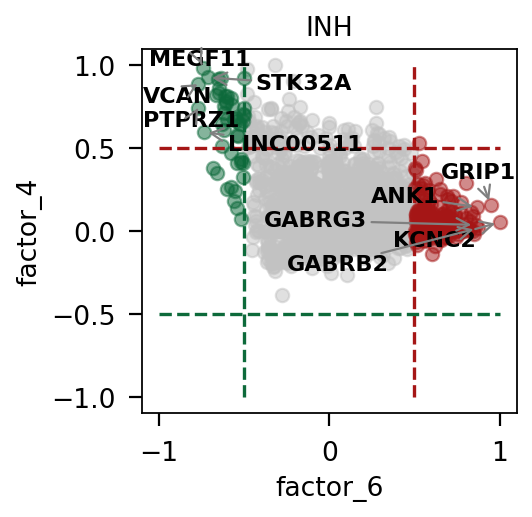

In [231]:
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(plot_data3.loc[plot_data3['sig']=='normal','factor_{}'.format(factor1)],
           plot_data3.loc[plot_data3['sig']=='normal','factor_{}'.format(factor2)],
          color='#c2c2c2',alpha=0.5)

ax.scatter(plot_data3.loc[plot_data3['sig']=='up','factor_{}'.format(factor1)],
           plot_data3.loc[plot_data3['sig']=='up','factor_{}'.format(factor2)],
           color='#a51616',alpha=0.5)


ax.scatter(plot_data3.loc[plot_data3['sig']=='down','factor_{}'.format(factor1)],
           plot_data3.loc[plot_data3['sig']=='down','factor_{}'.format(factor2)],
           color='#0d6a3b',alpha=0.5)

plt.vlines(x=0.5,ymin=-1,ymax=1,color='#a51616',linestyles='dashed')
plt.hlines(y=0.5,xmin=-1,xmax=1,color='#a51616',linestyles='dashed')

plt.vlines(x=-0.5,ymin=-1,ymax=1,color='#0d6a3b',linestyles='dashed')
plt.hlines(y=-0.5,xmin=-1,xmax=1,color='#0d6a3b',linestyles='dashed')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.grid(False)

plt.xlabel('factor_{}'.format(factor1),fontsize=12)
plt.ylabel('factor_{}'.format(factor2),fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

from adjustText import adjust_text

for sig,color in zip(['up','down'],
                     ['#a51616','#0d6a3b']):
    if 'up' in sig:
        hub_gene=plot_data3.loc[plot_data3['sig']==sig].sort_values('factor_{}'.format(factor1),ascending=False).index.tolist()
    else:
        hub_gene=plot_data3.loc[plot_data3['sig']==sig].sort_values('factor_{}'.format(factor1),ascending=True).index.tolist()
    if len(hub_gene)==0:
        continue
    texts=[ax.text(plot_data3.loc[i,'factor_{}'.format(factor1)],
                   plot_data3.loc[i,'factor_{}'.format(factor2)],
                   i,
                   fontdict={'size':10,'weight':'bold','color':'black'}
                   ) for i in hub_gene[:5]]

    adjust_text(texts,only_move={'text': 'xy'},arrowprops=dict(arrowstyle='->', color='grey'),)

plt.title('INH',fontsize=12)
plt.savefig("figures/factor_gene_inh.png",dpi=300,bbox_inches = 'tight')


In [13]:
import mofax as mfx
model = mfx.mofa_model('models/ad_rna_atac.hdf5')

In [63]:
pd.concat([factor_w,factor_w],axis=1)

factor_1  factor_2  factor_3  factor_4  factor_5  factor_6  \
GABRD      0.388015 -0.096568 -0.002226 -0.000855  0.000358  0.341265   
HES5       0.000463  0.276760 -0.031110 -0.003222  0.000457 -0.143575   
TTC34      0.113615  0.138576 -0.002731 -0.052147  0.007113 -0.004158   
PRDM16    -0.000092  0.901125 -0.147763 -0.171246 -0.043769 -0.362034   
LINC01646  0.000030 -0.000013 -0.000006 -0.000003  0.000025  0.000010   
...             ...       ...       ...       ...       ...       ...   
MT-CO3     0.242487 -0.046276 -0.026080  0.000190  0.000006  0.330310   
MT-ND3     0.125587 -0.000323 -0.065518 -0.000296 -0.007528  0.221193   
MT-ND4     0.161691 -0.001290 -0.074759  0.001310 -0.003568  0.260324   
MT-ND5     0.104282 -0.001342 -0.050181  0.000579 -0.009814  0.226687   
MT-CYB     0.165990 -0.001053 -0.057740 -0.000157 -0.004356  0.274541   

           factor_7  factor_8  factor_9  factor_10  ...  factor_4  factor_5  \
GABRD     -0.003031  0.000224 -0.003167   0.000032  ... -0.000855  0.000358   
HES5      -0.000092 -0.001769  0.002673   0.000025  ... -0.003222  0.000457   
TTC34     -0.002309 -0.001182 -0.017258   0.000029  ... -0.052147  0.007113   
PRDM16    -0.007310  0.023654 -0.012479   0.000570  ... -0.171246 -0.043769   
LINC01646  0.000036 -0.000005  0.000341   0.000002  ... -0.000003  0.000025   
...             ...       ...       ...        ...  ...       ...       ...   
MT-CO3    -0.054185 -0.004804 -0.144484   0.000268  ...  0.000190  0.000006   
MT-ND3    -0.035952 -0.004491 -0.072415   0.000308  ... -0.000296 -0.007528   
MT-ND4    -0.044698 -0.007164 -0.115841   0.000402  ...  0.001310 -0.003568   
MT-ND5    -0.020815 -0.002617 -0.073407   0.000290  ...  0.000579 -0.009814   
MT-CYB    -0.041253 -0.004388 -0.100811   0.000347  ... -0.000157 -0.004356   

           factor_6  factor_7  factor_8  factor_9  factor_10     factor_11  \
GABRD      0.341265 -0.003031  0.000224 -0.003167   0.000032 -2.651118e-04   
HES5      -0.143575 -0.000092 -0.001769  0.002673   0.000025  2.178488e-05   
TTC34     -0.004158 -0.002309 -0.001182 -0.017258   0.000029 -6.750181e-05   
PRDM16    -0.362034 -0.007310  0.023654 -0.012479   0.000570 -9.746646e-06   
LINC01646  0.000010  0.000036 -0.000005  0.000341   0.000002  4.687552e-07   
...             ...       ...       ...       ...        ...           ...   
MT-CO3     0.330310 -0.054185 -0.004804 -0.144484   0.000268 -9.001574e-04   
MT-ND3     0.221193 -0.035952 -0.004491 -0.072415   0.000308 -4.577748e-04   
MT-ND4     0.260324 -0.044698 -0.007164 -0.115841   0.000402 -6.540196e-04   
MT-ND5     0.226687 -0.020815 -0.002617 -0.073407   0.000290 -2.776113e-04   
MT-CYB     0.274541 -0.041253 -0.004388 -0.100811   0.000347 -4.972872e-04   

           factor_12  factor_13  
GABRD      -0.001843  -0.028821  
HES5       -0.000227  -0.258354  
TTC34       0.000351  -0.207835  
PRDM16      0.002236  -0.865202  
LINC01646  -0.000014  -0.000011  
...              ...        ...  
MT-CO3      0.001719  -0.307852  
MT-ND3      0.001609  -0.256856  
MT-ND4      0.001242  -0.289882  
MT-ND5      0.001331  -0.171389  
MT-CYB      0.001635  -0.265953  

[3161 rows x 26 columns]

In [64]:
import anndata
import scanpy as sc
adata1=anndata.AnnData(pd.concat([factor_w,factor_w],axis=1).T)

In [65]:
adata1.obs['Factor']=adata1.obs.index
adata1.obs['Factor']=adata1.obs['Factor'].astype('category')
adata1

AnnData object with n_obs × n_vars = 26 × 3161
    obs: 'Factor'

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


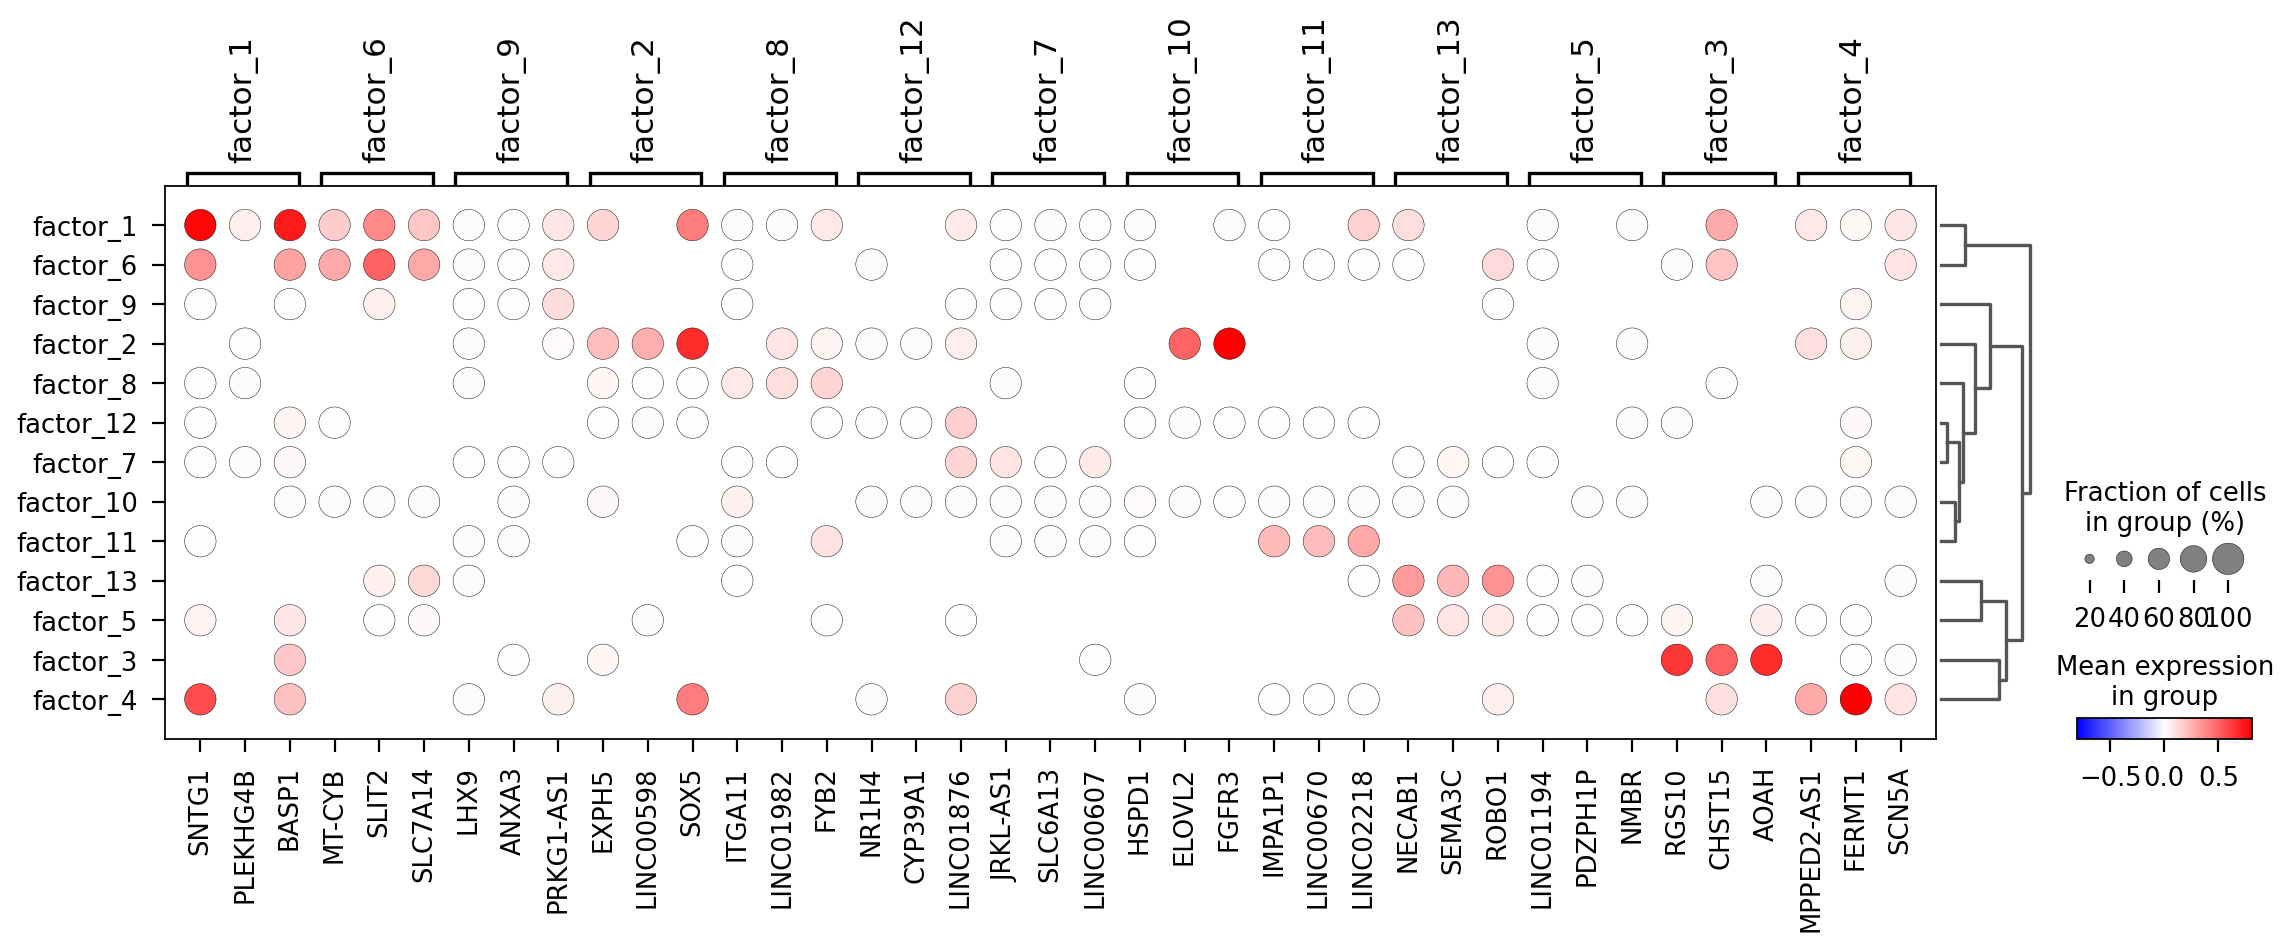

In [101]:
sc.tl.rank_genes_groups(adata1, groupby='Factor', method='wilcoxon')
ax=sc.pl.rank_genes_groups_dotplot(adata1, n_genes=3, 
                                cmap='bwr',show=False)


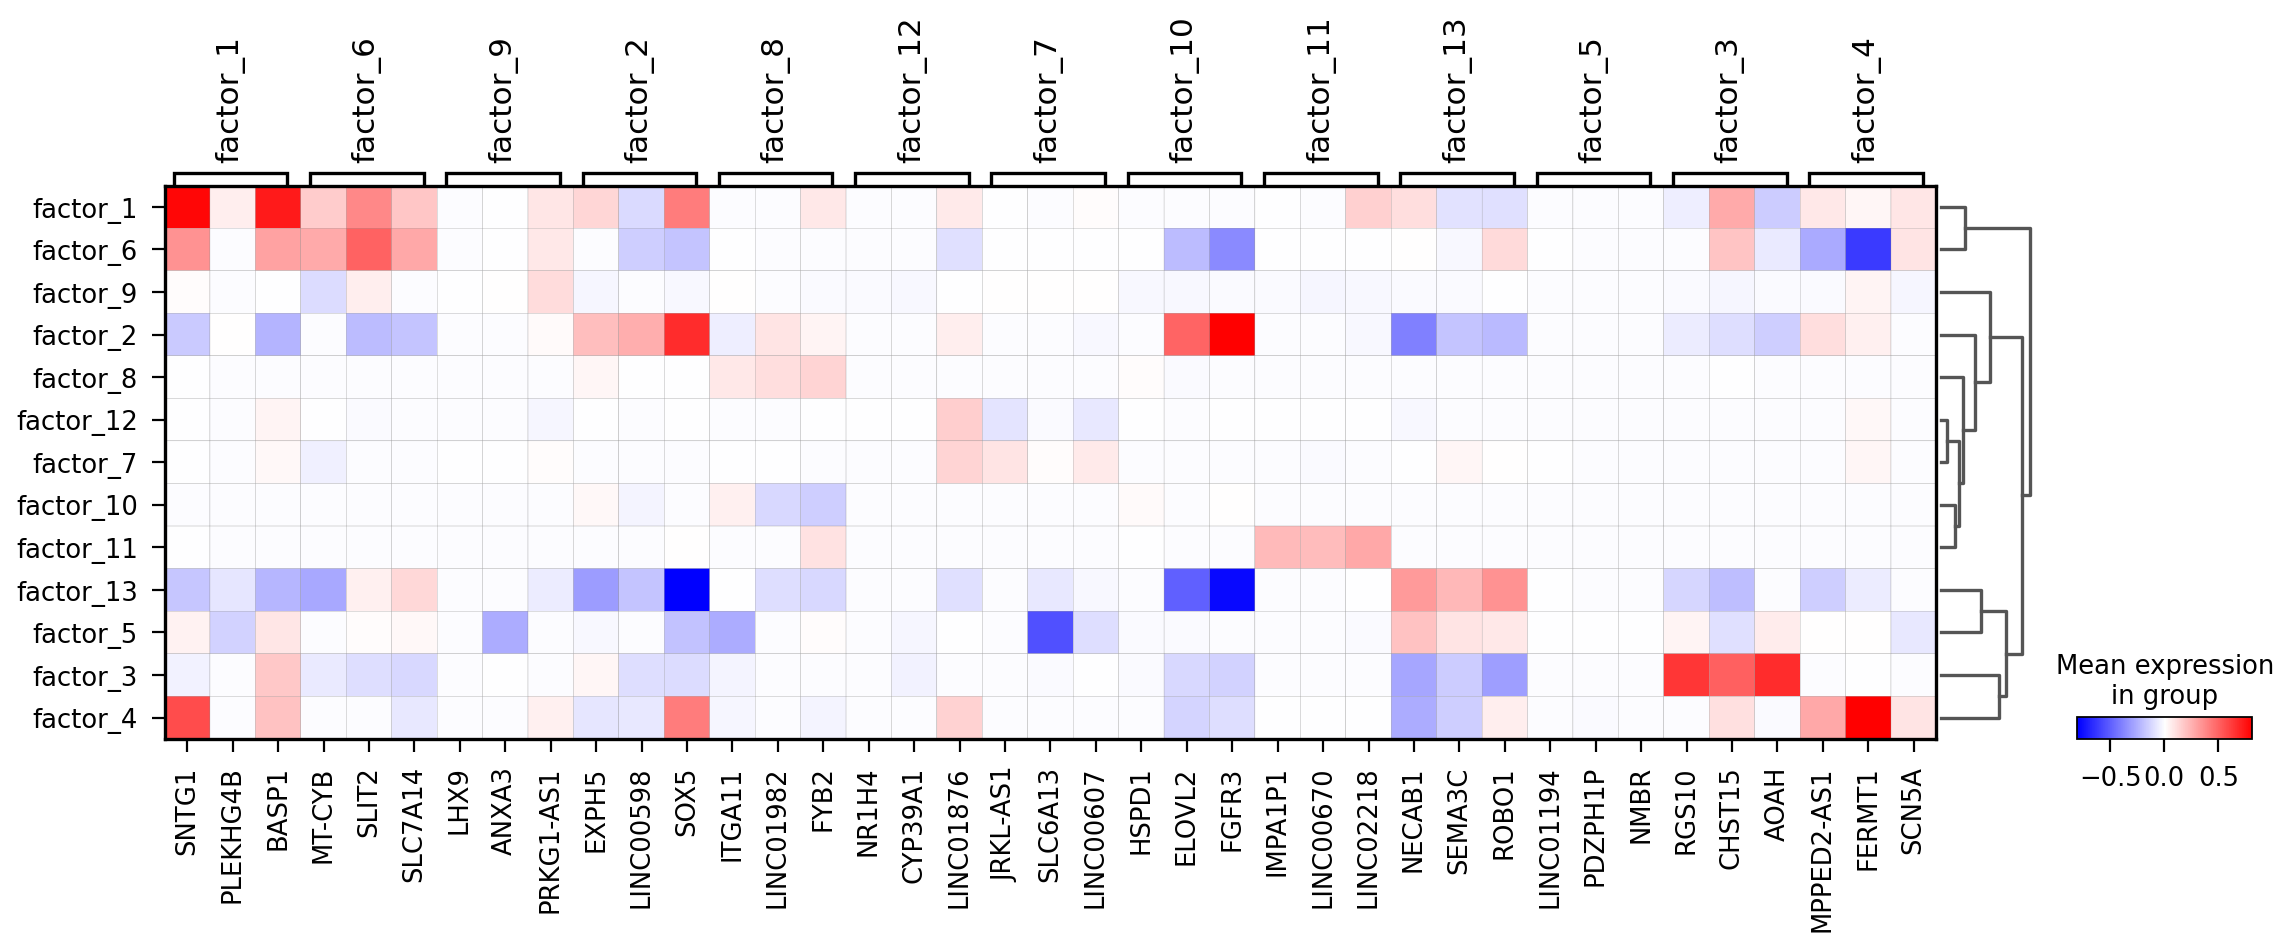

In [67]:
sc.pl.rank_genes_groups_matrixplot(adata1, n_genes=3,  cmap='bwr')

In [98]:
import numpy as np
def get_celltype_marker(adata:anndata.AnnData,
                            clustertype:str='leiden',
                            log2fc_min:int=2,
                            pval_cutoff:float=0.05,rank:bool=True)->dict:
        r"""Get marker genes for each clusters.
        
        Arguments:
            adata: anndata object
            clustertype: Clustering name used in scanpy. (leiden)
            log2fc_min: Minimum log2 fold change of marker genes. (2)
            pval_cutoff: Maximum p value of marker genes. (0.05)
            rank: Whether to rank genes by wilcoxon test. (True)

        Returns:
            cellmarker: A dictionary of marker genes for each clusters.
        """
        print('...get cell type marker')
        celltypes = sorted(adata.obs[clustertype].unique())
        cell_marker_dict={}
        if rank==False and 'rank_genes_groups' in adata.uns.keys():
            sc.tl.rank_genes_groups(adata, clustertype, method='wilcoxon')
        for celltype in celltypes:
            degs = sc.get.rank_genes_groups_df(adata, group=celltype, key='rank_genes_groups', log2fc_min=log2fc_min, 
                                            pval_cutoff=pval_cutoff)
            foldp=np.histogram(degs['logfoldchanges'])
            foldchange=(foldp[1][np.where(foldp[1]>0)[0][-5]]+foldp[1][np.where(foldp[1]>0)[0][-6]])/2
            
            cellmarker=degs.loc[degs['logfoldchanges']>foldchange]['names'].values
            cell_marker_dict[celltype]=cellmarker

        return cell_marker_dict
    
res_dict=get_celltype_marker(adata1,clustertype='Factor',
                            log2fc_min=3,pval_cutoff=0.1)



...get cell type marker


In [99]:
res_dict

{'factor_1': array(['SORBS2', 'CEP126', 'MIR4500HG', 'SEL1L3', 'PPP3CA', 'CCDC171',
        'HPYR1', 'ADRA1B', 'TUBBP5', 'TMEM38A', 'TMEM241', 'TMEM179',
        'CAMKK1', 'NECTIN3-AS1', 'CNTNAP3P2', 'LINC00351', 'CHRM5'],
       dtype=object),
 'factor_10': array([], dtype=object),
 'factor_11': array([], dtype=object),
 'factor_12': array([], dtype=object),
 'factor_13': array(['BCL6', 'MT1H'], dtype=object),
 'factor_2': array(['B3GAT2', 'GABRB1', 'GLDC', 'NTRK2', 'ITGA9-AS1', 'ADAMTS17'],
       dtype=object),
 'factor_3': array([], dtype=object),
 'factor_4': array([], dtype=object),
 'factor_5': array([], dtype=object),
 'factor_6': array(['AKAIN1', 'DLX1', 'GRIP2', 'DLX6-AS1', 'TAC1', 'CASC6', 'TRIM55',
        'GRPR', 'ANKRD7', 'GIPC2', 'CHRDL1'], dtype=object),
 'factor_7': array([], dtype=object),
 'factor_8': array([], dtype=object),
 'factor_9': array([], dtype=object)}

In [87]:
pd.DataFrame(adata1.uns['rank_genes_groups']['pvals_adj'])

factor_1  factor_10  factor_11  factor_12  factor_13  factor_2  \
0     0.049316   0.835037   0.909858   0.430013   0.044684  0.059848   
1     0.049316   0.835037   0.909858   0.430013   0.044684  0.059848   
2     0.049316   0.835037   0.909858   0.430013   0.044684  0.059848   
3     0.049316   0.835037   0.909858   0.430013   0.044684  0.059848   
4     0.049316   0.835037   0.909858   0.430013   0.044684  0.059848   
...        ...        ...        ...        ...        ...       ...   
3156  0.049316   0.835037   0.909858   0.430013   0.044684  0.059848   
3157  0.049316   0.835037   0.909858   0.430013   0.044684  0.059848   
3158  0.049316   0.835037   0.909858   0.430013   0.044684  0.059848   
3159  0.049316   0.835037   0.909858   0.430013   0.044684  0.059848   
3160  0.049316   0.835037   0.909858   0.430013   0.044684  0.059848   

      factor_3  factor_4  factor_5  factor_6  factor_7  factor_8  factor_9  
0     0.136075  0.225811  0.140408   0.09445  0.538405  0.865735  0.177299  
1     0.136075  0.225811  0.140408   0.09445  0.538405  0.865735  0.177299  
2     0.136075  0.225811  0.140408   0.09445  0.538405  0.865735  0.177299  
3     0.136075  0.225811  0.140408   0.09445  0.538405  0.865735  0.177299  
4     0.136075  0.225811  0.140408   0.09445  0.538405  0.865735  0.177299  
...        ...       ...       ...       ...       ...       ...       ...  
3156  0.136075  0.225811  0.140408   0.09445  0.538405  0.865735  0.177299  
3157  0.136075  0.225811  0.140408   0.09445  0.538405  0.865735  0.177299  
3158  0.136075  0.225811  0.140408   0.09445  0.538405  0.865735  0.177299  
3159  0.136075  0.225811  0.140408   0.09445  0.538405  0.865735  0.177299  
3160  0.136075  0.225811  0.140408   0.09445  0.538405  0.865735  0.177299  

[3161 rows x 13 columns]

In [91]:
#sc.tl.rank_genes_groups(adata1, clustertype, method='wilcoxon')
degs = sc.get.rank_genes_groups_df(adata1, group='factor_1', key='rank_genes_groups', log2fc_min=2, 
                                            pval_cutoff=0.05)
degs

names    scores  logfoldchanges     pvals  pvals_adj
0        SNTG1  2.309401        4.500756  0.020921   0.049316
1        BASP1  2.309401        5.058449  0.020921   0.049316
2    LINC02150  2.309401        6.360254  0.020921   0.049316
3        AEBP2  2.309401        5.160892  0.020921   0.049316
4    LINC02398  2.309401        6.242045  0.020921   0.049316
..         ...       ...             ...       ...        ...
726       NOX4 -2.309401        4.731972  0.020921   0.049316
727      NEAT1 -2.309401        4.084878  0.020921   0.049316
728  LINC01170 -2.309401        5.790870  0.020921   0.049316
729      LTBP1 -2.309401        3.040365  0.020921   0.049316
730       ROR1 -2.309401        3.563920  0.020921   0.049316

[731 rows x 5 columns]

In [3]:
pymofa_obj=ov.single._mofa.pyMOFA(model_path='models/ad_rna_atac.hdf5')

In [5]:
pymofa_obj.get_factors(rna1)
rna1

AnnData object with n_obs × n_vars = 5000 × 3161
    obs: 'SampleID', 'Diagnosis', 'Batch', 'Cell.Type', 'cluster', 'Age', 'Sex', 'PMI', 'Tangle.Stage', 'Plaque.Stage', 'RIN', 'balancing_weight', 'domain', 'factor1', 'factor2', 'factor3', 'factor4', 'factor5', 'factor6', 'factor7', 'factor8', 'factor9', 'factor10', 'factor11', 'factor12', 'factor13'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'hgnc_id'
    uns: 'Cell.Type_colors', '__scglue__', 'domain_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_glue', 'X_mde', 'X_pca', 'X_umap', 'X_mofa'
    varm: 'PCs', 'X_glue'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

(<Figure size 160x240 with 2 Axes>,
 <AxesSubplot: title={'center': 'Varience'}, xlabel='View', ylabel='Factor'>)

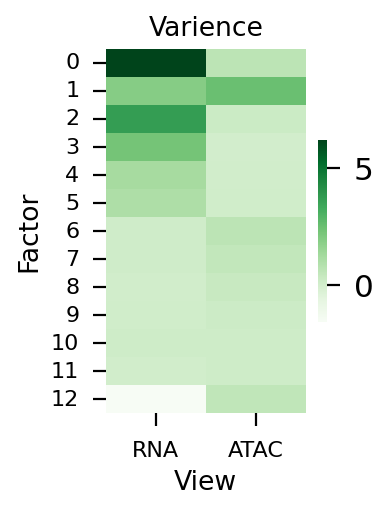

In [6]:
pymofa_obj.plot_r2()

In [9]:
pymofa_obj.r2

RNA      ATAC
0   6.185937  0.625745
1   1.907447  2.482087
2   3.663136  0.207662
3   2.290023  0.001297
4   1.176851  0.032663
5   1.002245  0.042093
6   0.090284  0.616941
7   0.074696  0.465844
8   0.020677  0.323996
9   0.048964  0.178057
10  0.109093  0.103680
11  0.031659  0.124130
12 -1.605516  0.531147

(<Figure size 480x240 with 2 Axes>,
 <AxesSubplot: title={'center': 'Correlation'}, xlabel='Factor', ylabel='Cell.Type'>)

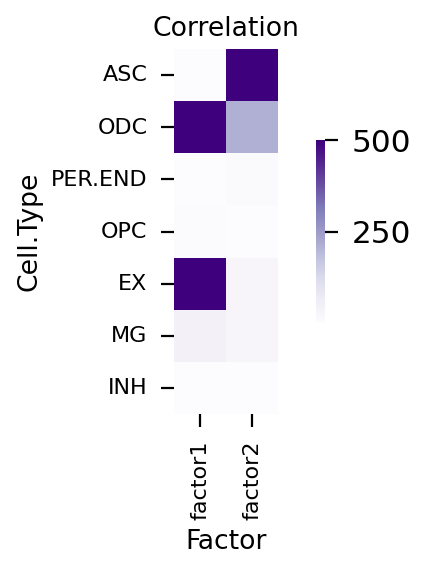

In [8]:
pymofa_obj.plot_cor(rna1,'Cell.Type')

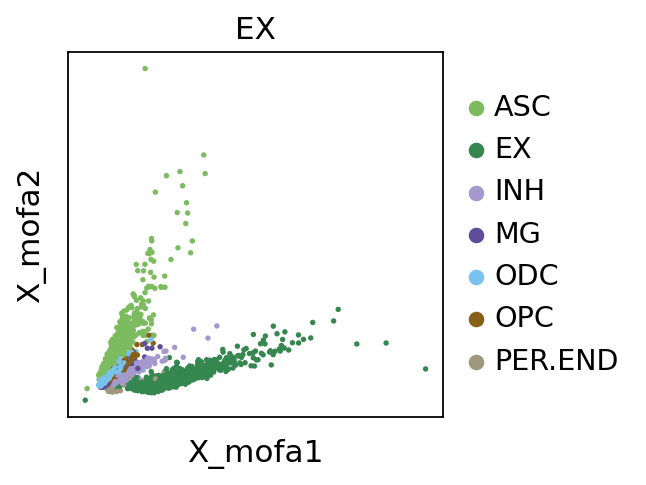

(<Figure size 240x240 with 1 Axes>,
 <AxesSubplot: title={'center': 'EX'}, xlabel='X_mofa1', ylabel='X_mofa2'>)

In [10]:
pymofa_obj.plot_factor(rna1,'Cell.Type','EX',figsize=(3,3),
                    factor1=1,factor2=2,)

(<Figure size 240x240 with 1 Axes>,
 <AxesSubplot: xlabel='factor_1', ylabel='factor_2'>)

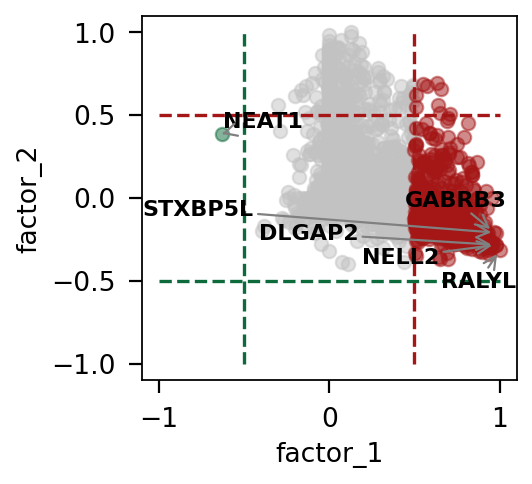

In [11]:
pymofa_obj.plot_weight_gene_d1(view='RNA',factor1=1,factor2=2,)

In [ ]:
pymofa_obj.plot_weight_gene_d2(view='RNA',factor1=1,factor2=2,)

(<Figure size 240x320 with 1 Axes>,
 <AxesSubplot: title={'center': 'factor_1'}, xlabel='Feature rank', ylabel='Weight'>)

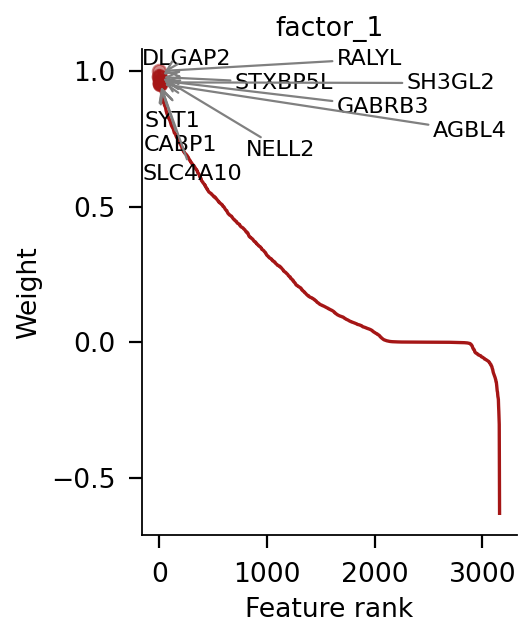

In [14]:
pymofa_obj.plot_weights(view='RNA',factor=1)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=25
    finished (0:00:00)
Storing dendrogram info using `.uns['dendrogram_Factor']`


{'mainplot_ax': <AxesSubplot: >,
 'group_extra_ax': <AxesSubplot: >,
 'gene_group_ax': <AxesSubplot: >,
 'size_legend_ax': <AxesSubplot: title={'center': 'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot: title={'center': 'Mean expression\nin group'}>}

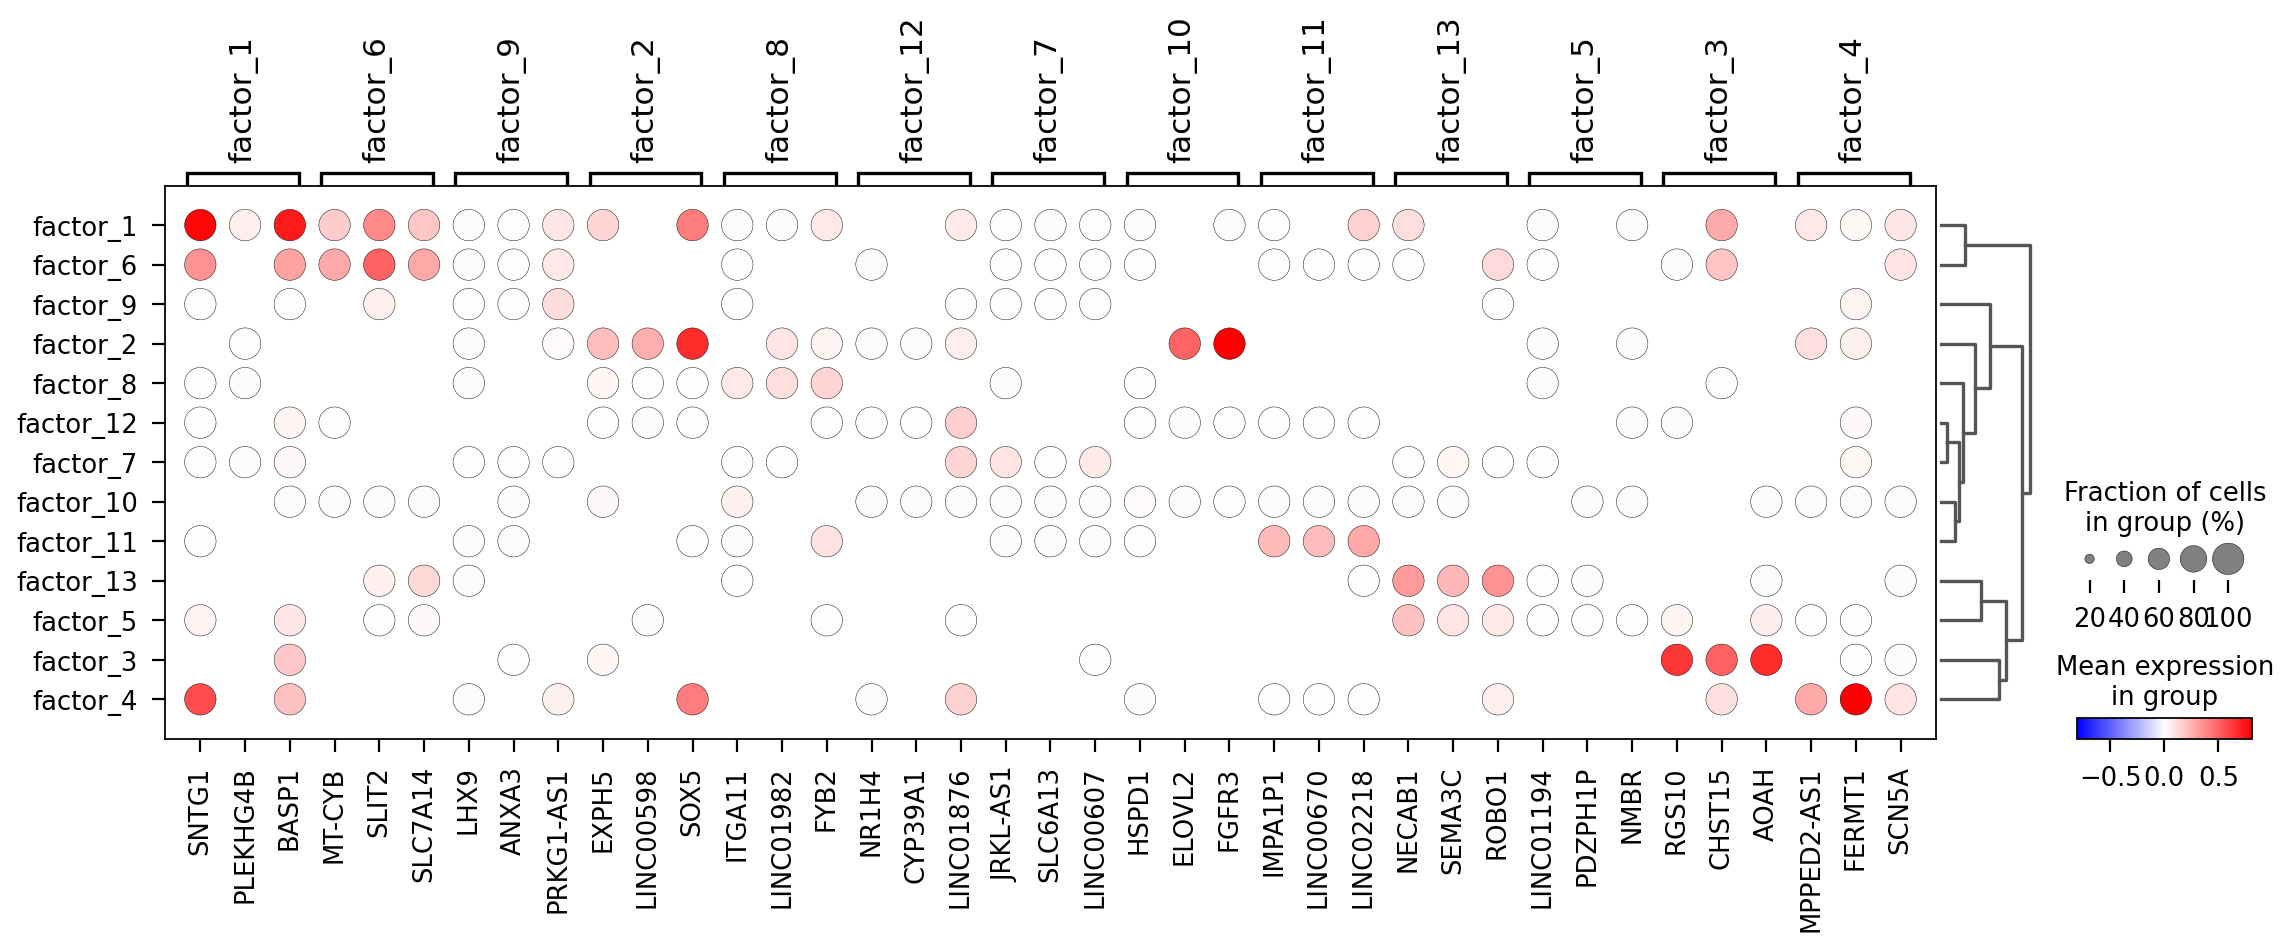

In [15]:
pymofa_obj.plot_top_feature_dotplot(view='RNA')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=25
    finished (0:00:00)
Storing dendrogram info using `.uns['dendrogram_Factor']`


{'mainplot_ax': <AxesSubplot: >,
 'group_extra_ax': <AxesSubplot: >,
 'gene_group_ax': <AxesSubplot: >,
 'color_legend_ax': <AxesSubplot: title={'center': 'Mean expression\nin group'}>}

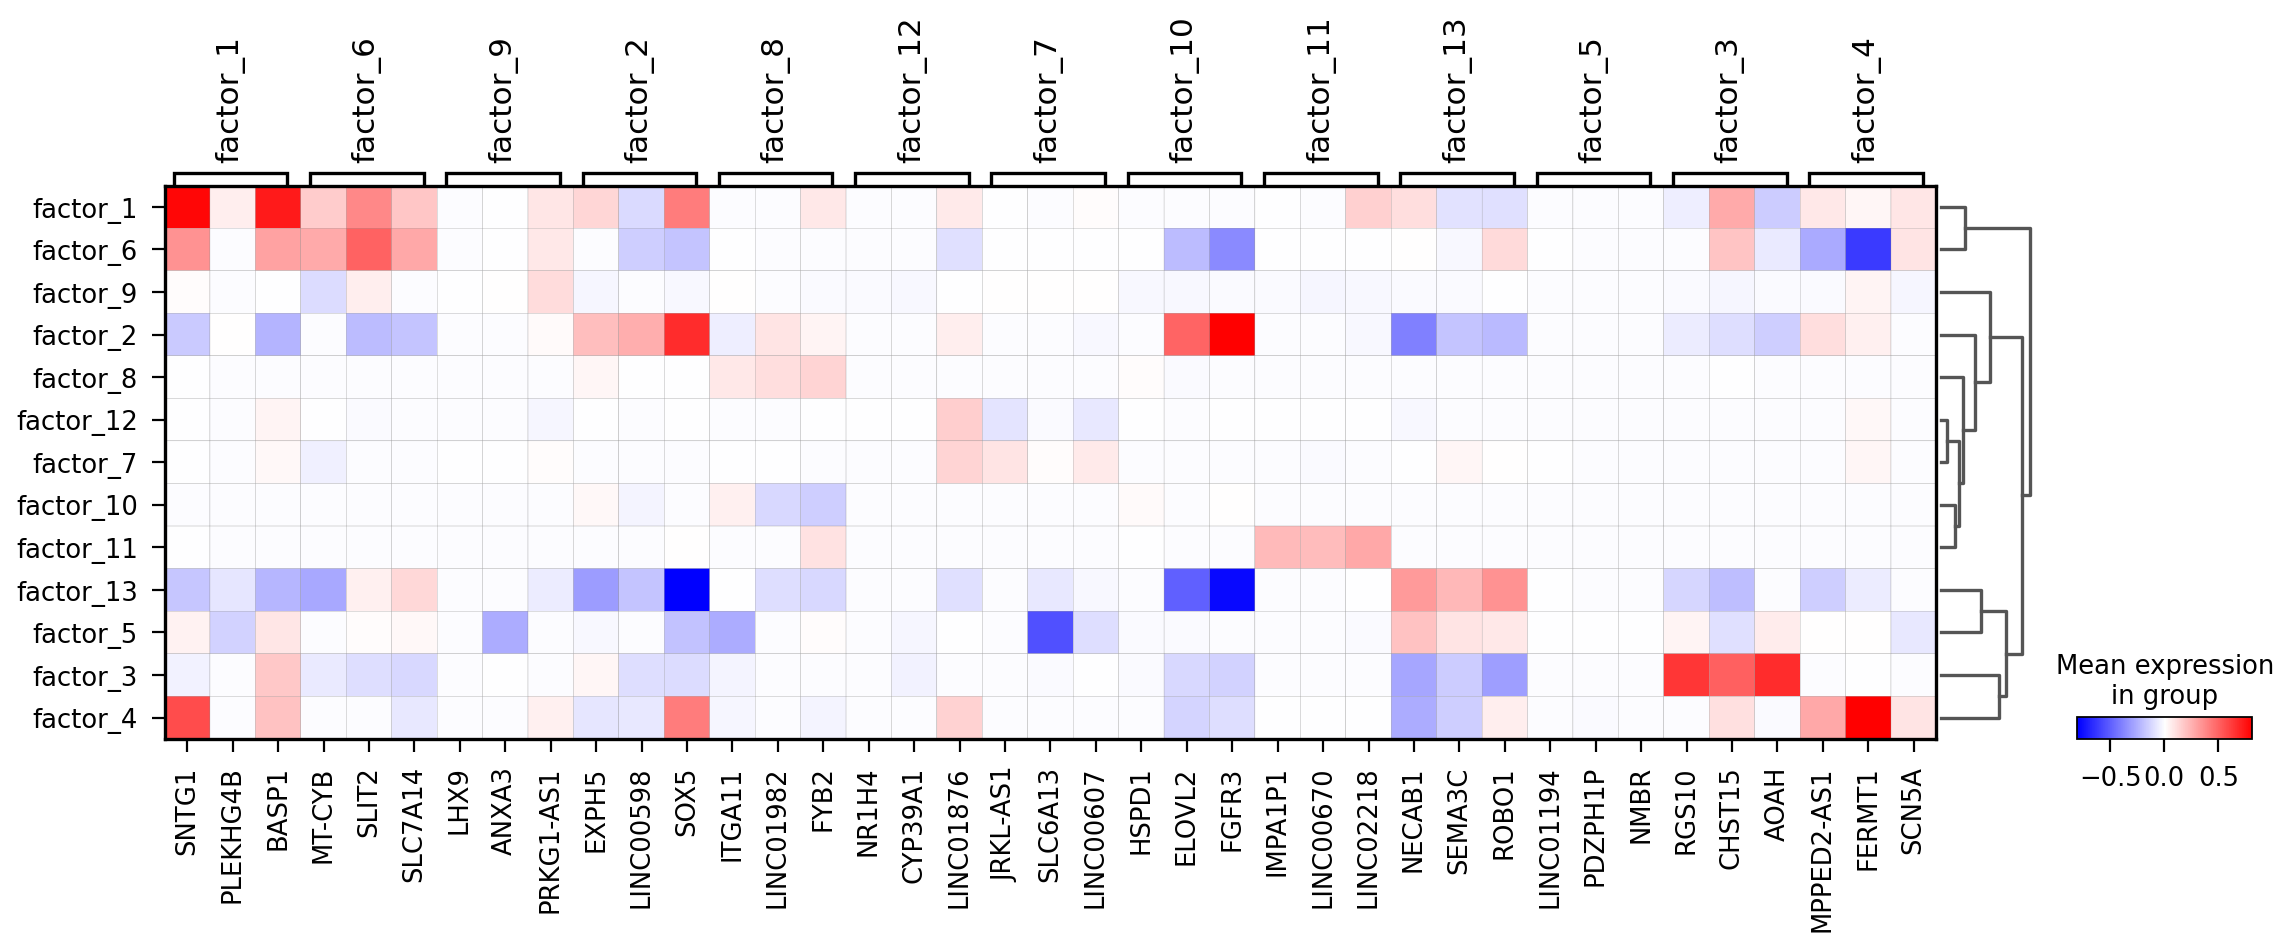

In [17]:
pymofa_obj.plot_top_feature_heatmap(view='RNA')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=25
    finished (0:00:00)
Storing dendrogram info using `.uns['dendrogram_Factor']`


{'mainplot_ax': <AxesSubplot: >,
 'group_extra_ax': <AxesSubplot: >,
 'gene_group_ax': <AxesSubplot: >,
 'size_legend_ax': <AxesSubplot: title={'center': 'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot: title={'center': 'Mean expression\nin group'}>}

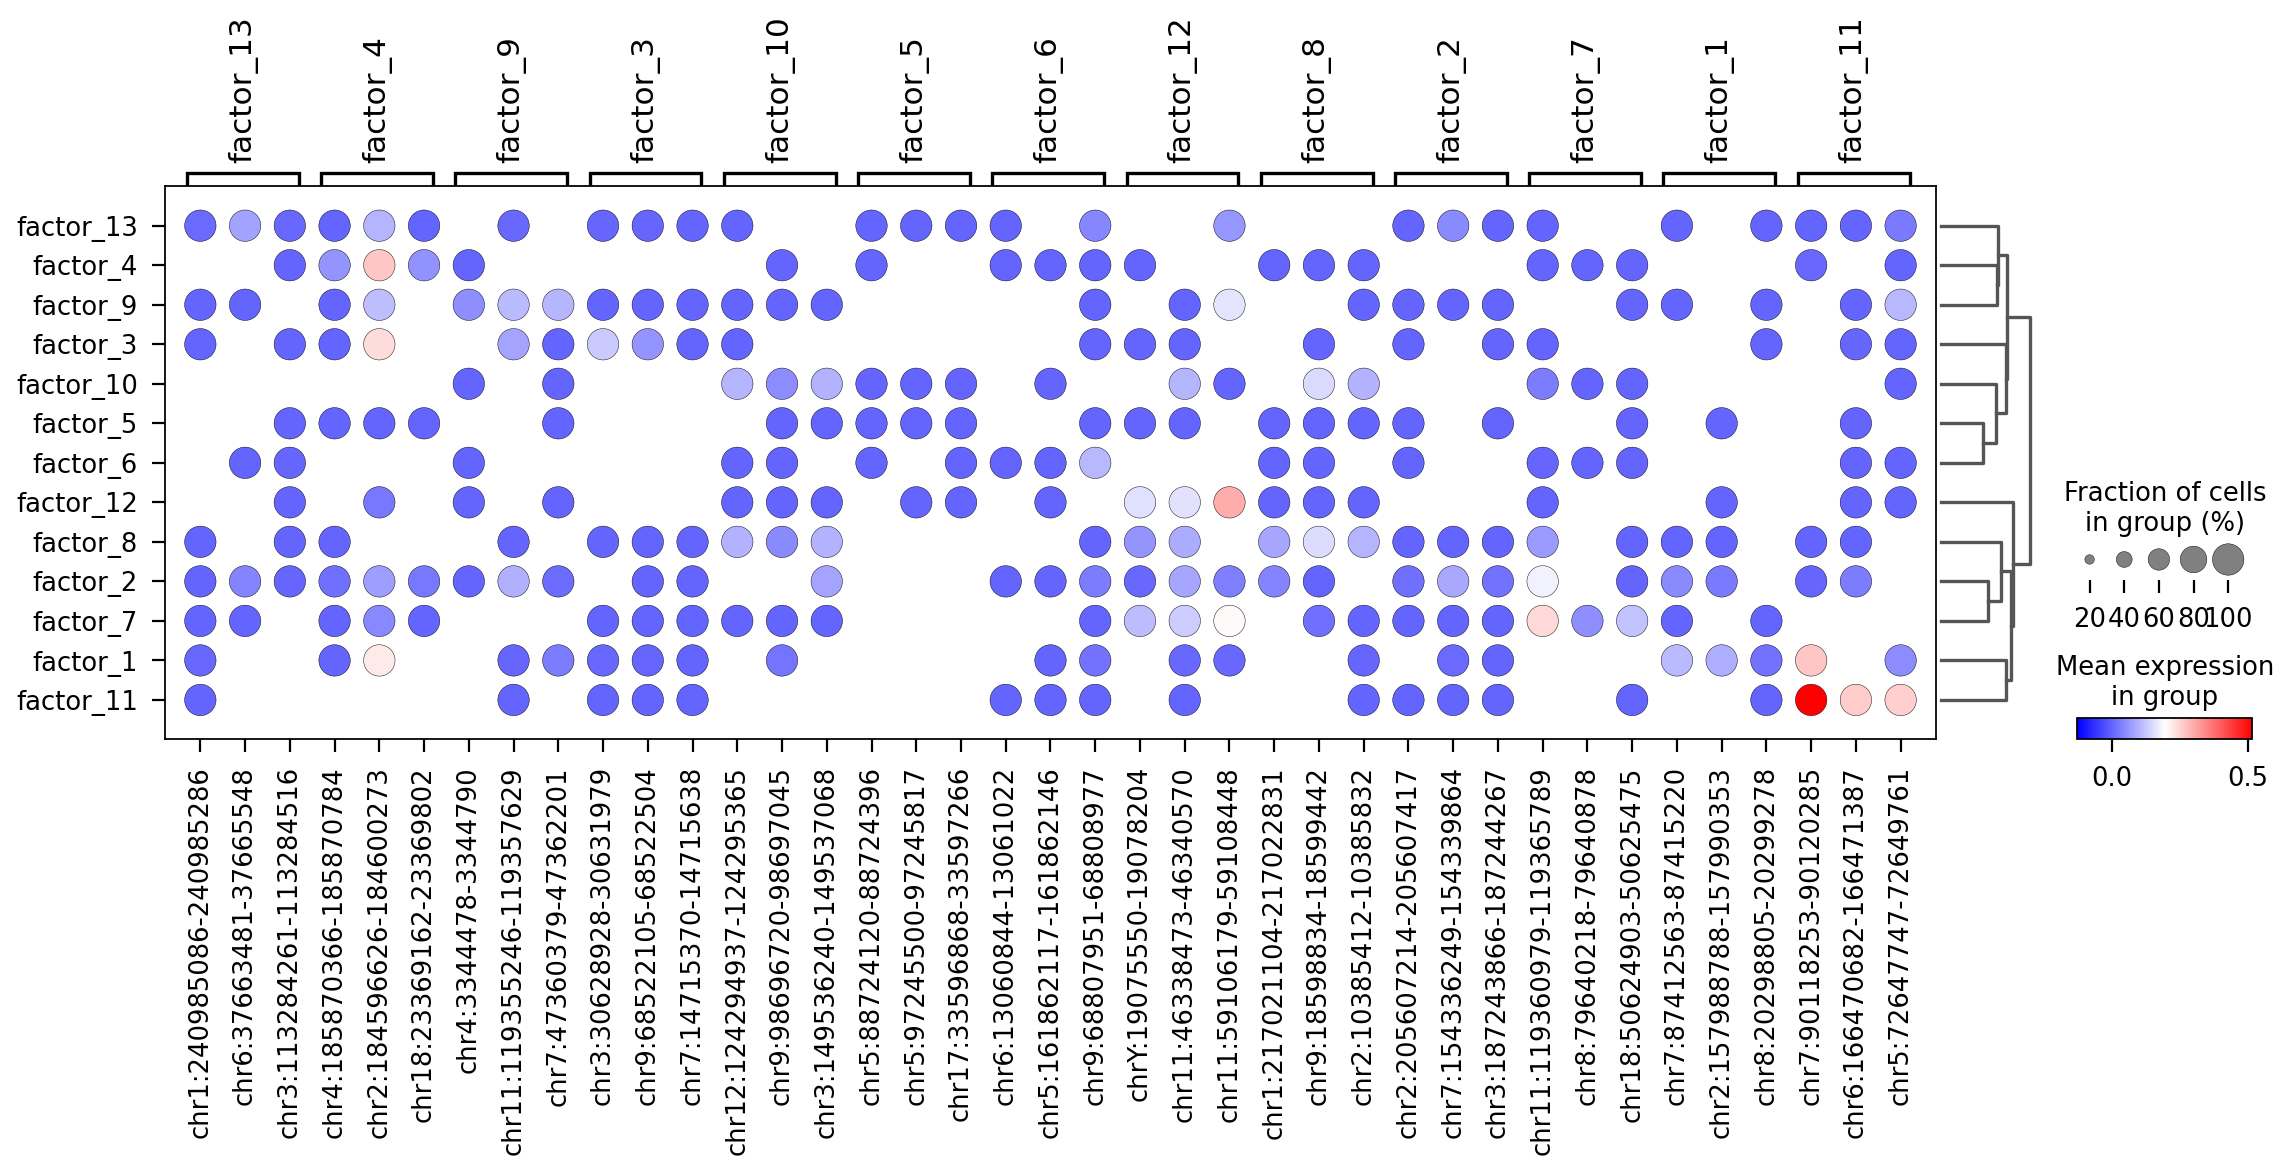

In [16]:
pymofa_obj.plot_top_feature_dotplot(view='ATAC')

In [18]:
import igraph
igraph.__version__

'0.10.4'